##
    PassengerId : 각 승객의 고유 번호
    Survived : 생존 여부(종속 변수)
    0 = 사망
    1 = 생존
    Pclass : 객실 등급 - 승객의 사회적, 경제적 지위
    1st = Upper
    2nd = Middle
    3rd = Lower
    Name : 이름
    Sex : 성별
    Age : 나이
    SibSp : 동반한 Sibling(형제자매)와 Spouse(배우자)의 수
    Parch : 동반한 Parent(부모) Child(자식)의 수
    Ticket : 티켓의 고유넘버
    Fare : 티켓의 요금
    Cabin : 객실 번호
    Embarked : 승선한 항
    C = Cherbourg
    Q = Queenstown
    S = Southampton
##

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [9]:
gender_submission = pd.read_csv('gender_submission.csv')
train  = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

gender_submission = gender_submission.set_index('PassengerId')
train = train.set_index('PassengerId')
test = test.set_index('PassengerId')

test = pd.concat([test, gender_submission], axis =1)


In [10]:
gender_submission

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [11]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [12]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0


## 데이터 결측 

In [14]:
train_null_val = train.isnull().sum()
train_null_val_per = (100*train_null_val)/len(train)
df_train_null = pd.concat([train_null_val,train_null_val_per],axis = 1)
df_train_null.columns = ['count','per']
df_train_null

,count,per
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000
Cabin,687,77.104377


In [15]:
train[train['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [16]:
train['Embarked'].value_counts().keys()[0]

'S'

In [17]:
train['Embarked'] =  train['Embarked'].fillna(train['Embarked'].value_counts().keys()[0])

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [19]:
gender_submission_null_val = gender_submission.isnull().sum()
gender_submission_null_val_per = (100*gender_submission_null_val)/len(gender_submission)
df_gender_submission_null = pd.concat([gender_submission_null_val,gender_submission_null_val_per],axis = 1)
df_gender_submission_null.columns = ['count','per']
df_gender_submission_null

,count,per
Survived,0,0.0


In [20]:
plt.style.use('ggplot')
sns.set()
sns.set_palette("Set2")

def chart(dataset, feature):
    survived = dataset[dataset['Survived'] == 1][feature].value_counts()
    dead = dataset[dataset['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['< Survived >', '< Dead >']
    return df


          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp    -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

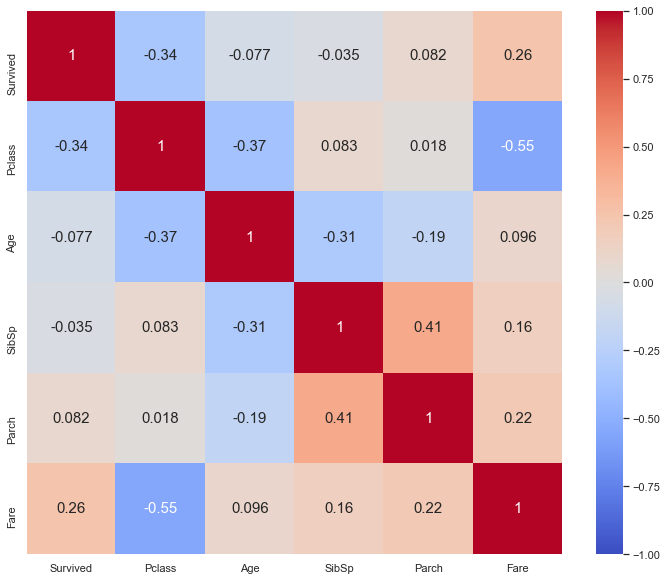

In [21]:
print(train.corr())
plt.figure(figsize=(12,10))
plt.rc('font', size = 15)
sns.heatmap(train.corr(), vmin = -1, vmax = 1 , annot = True, cmap = 'coolwarm'  )

(          Survived   Dead  Surv_per  Dead_per
 0 ~ 10        38.0   24.0      0.61      0.39
 10 ~ 20       41.0   61.0      0.40      0.60
 20 ~ 30       77.0  143.0      0.35      0.65
 30 ~ 40       73.0   94.0      0.44      0.56
 40 ~ 50       34.0   55.0      0.38      0.62
 50 ~ 60       20.0   28.0      0.42      0.58
 60 ~ 70        6.0   15.0      0.29      0.71,
             Survived   Dead  Surv_per  Dead_per
 0 ~ 50         233.0  497.0      0.32      0.68
 50 ~ 100        70.0   38.0      0.65      0.35
 100 ~ 150       19.0    5.0      0.79      0.21
 150 ~ 200        6.0    3.0      0.67      0.33
 200 ~ 250        7.0    4.0      0.64      0.36
 250 ~ 300        4.0    2.0      0.67      0.33
 300 ~ 350        0.0    0.0      0.00      0.00
 350 ~ 400        0.0    0.0      0.00      0.00
 400 ~ 450        0.0    0.0      0.00      0.00
 450 ~ 500        0.0    0.0      0.00      0.00
 500 ~ 550        3.0    0.0      1.00      0.00)

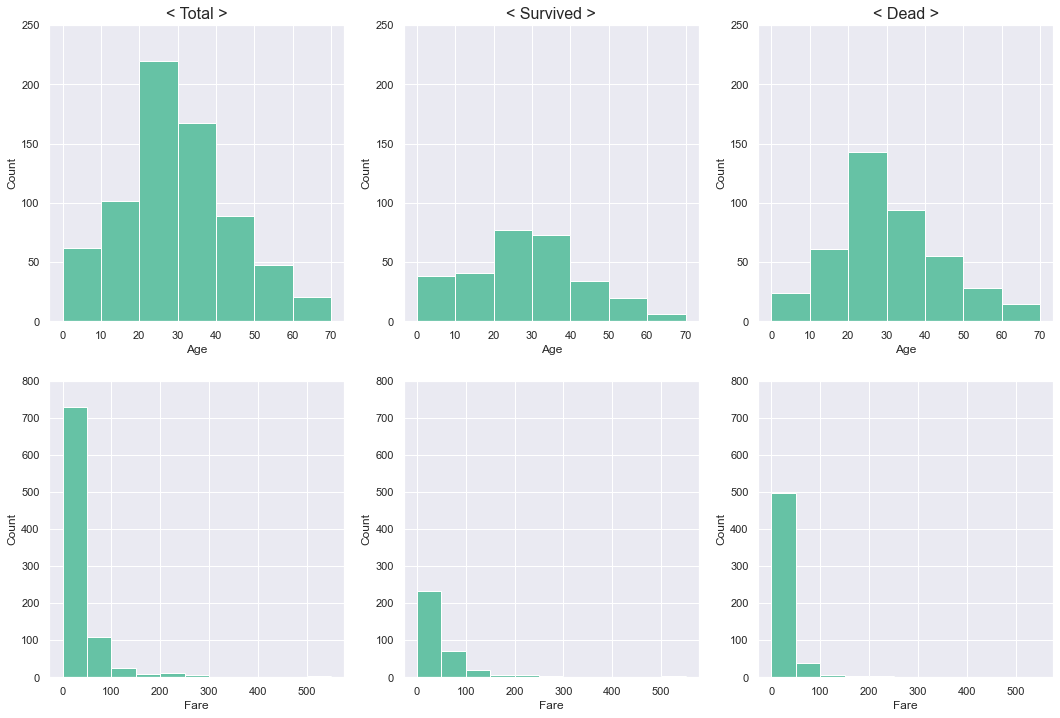

In [22]:
plt.figure(figsize=(18,12))

plt.subplot(2,3,1)

plt.hist(train['Age'], bins = range(0,80,10) )
plt.xlabel('Age')
plt.ylabel('Count')
plt.ylim(0,250)
plt.title('< Total >', fontsize = 16)

plt.subplot(2,3,2)

Age_pcounts_S, _ , _ = plt.hist(train[train['Survived'] == 1]['Age'], bins = range(0,80,10) )
plt.xlabel('Age')
plt.ylabel('Count')
plt.ylim(0,250)
plt.title('< Survived >', fontsize = 16)

plt.subplot(2,3,3)
Age_pcounts_D, _ , _ = plt.hist(train[train['Survived'] == 0]['Age'], bins = range(0,80,10) )
plt.xlabel('Age')
plt.ylabel('Count')
plt.ylim(0,250)
plt.title('< Dead >',fontsize = 16)

plt.subplot(2,3,4)
plt.hist(train['Fare'], bins = range(0,551,50))
plt.xlabel('Fare')
plt.ylabel('Count')
plt.ylim(0,800)
# plt.title('< Survived >', fontsize = 14)

plt.subplot(2,3,5)
Fare_pcounts_S, _ , _ = plt.hist(train[train['Survived'] == 1]['Fare'], bins = range(0,551,50))
plt.xlabel('Fare')
plt.ylabel('Count')
plt.ylim(0,800)
# plt.title('< Survived >', fontsize = 14)

plt.subplot(2,3,6)
Fare_pcounts_D, _ , _= plt.hist(train[train['Survived'] == 0]['Fare'], bins = range(0,551,50),label=True)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.ylim(0,800)
# plt.title('< Dead >',fontsize = 14)

df_sss  = pd.DataFrame(columns =["{} ~ {} ".format(i,i+10) for i in range(0,70,10)], index = ['Survived','Dead'], data = [Age_pcounts_S,Age_pcounts_D]).T
df_sss['Surv_per'] = [ round(df_sss['Survived'][i]/(df_sss['Survived'][i]+df_sss['Dead'][i]),2) for i in df_sss.index] 
df_sss['Dead_per'] = [ round(df_sss['Dead'][i]/(df_sss['Survived'][i]+df_sss['Dead'][i]),2) for i in df_sss.index ]

df_aaa  = pd.DataFrame(columns =["{} ~ {} ".format(i,i+50) for i in range(0,550,50)], index = ['Survived','Dead'], data = [Fare_pcounts_S,Fare_pcounts_D]).T
df_aaa['Surv_per'] = [ round(df_aaa['Survived'][i]/(df_aaa['Survived'][i]+df_aaa['Dead'][i]),2) if df_aaa['Survived'][i] != 0 or df_aaa['Survived'][i] != df_aaa['Dead'][i] else 0  for i in df_aaa.index] 
df_aaa['Dead_per'] = [ round(df_aaa['Dead'][i]/(df_aaa['Survived'][i]+df_aaa['Dead'][i]),2) if df_aaa['Dead'][i] != 0 or df_aaa['Survived'][i] != df_aaa['Dead'][i] else 0  for i in df_aaa.index ]

df_sss, df_aaa


In [23]:
plt.figure(figsize=(20,18))

plt.subplot(3,2,1)
chart(train,'Pclass').plot(kind = 'bar', title = 'Pclass' ,stacked =True,ax=plt.gca(), rot=0) #df plot 파라미터 : kind plot 종류, stacked 데이터 쌓기, ax 서브플랏으로 그리기 , rot x label 방향 돌리기
plt.gca().title.set_size(20)

plt.subplot(3,2,2)
chart(train,'Sex').plot(kind = 'bar', title = 'Sex', stacked =True, ax=plt.gca(), rot=0)
plt.gca().title.set_size(20)

plt.subplot(3,2,3)
chart(train,'SibSp').plot(kind = 'bar', title = 'SibSp', stacked =True, ax=plt.gca(), rot=0 )
plt.gca().title.set_size(20)

plt.subplot(3,2,4)
chart(train,'Parch').plot(kind = 'bar', title = 'Parch', stacked =True, ax=plt.gca(), rot=0)
plt.gca().title.set_size(20)

plt.subplot(3,2,5)
chart(train,'Embarked').plot(kind = 'bar', title = 'Embarked', stacked =True, ax=plt.gca(), rot=0)
plt.gca().title.set_size(20)

In [ ]:
f_name_list = []
title_list = []
l_name_list  = []

for name in train['Name']:
    f_name, other = name.split(',')
    f_name = f_name.strip()
    print(f_name)
    f_name_list.append(f_name)

    title  = other.split('.')[0]
    title = title.strip() 
    l_name = other.split('.')[-1]
    l_name = l_name.strip()
    title_list.append(title)
    l_name_list.append(l_name)

new_train = train
new_train['F_name'] = f_name_list
new_train['Title'] = title_list
new_train['L_name'] = l_name_list 
del(new_train['Name'])
    

Braund
Cumings
Heikkinen
Futrelle
Allen
Moran
McCarthy
Palsson
Johnson
Nasser
Sandstrom
Bonnell
Saundercock
Andersson
Vestrom
Hewlett
Rice
Williams
Vander Planke
Masselmani
Fynney
Beesley
McGowan
Sloper
Palsson
Asplund
Emir
Fortune
O'Dwyer
Todoroff
Uruchurtu
Spencer
Glynn
Wheadon
Meyer
Holverson
Mamee
Cann
Vander Planke
Nicola-Yarred
Ahlin
Turpin
Kraeff
Laroche
Devaney
Rogers
Lennon
O'Driscoll
Samaan
Arnold-Franchi
Panula
Nosworthy
Harper
Faunthorpe
Ostby
Woolner
Rugg
Novel
West
Goodwin
Sirayanian
Icard
Harris
Skoog
Stewart
Moubarek
Nye
Crease
Andersson
Kink
Jenkin
Goodwin
Hood
Chronopoulos
Bing
Moen
Staneff
Moutal
Caldwell
Dowdell
Waelens
Sheerlinck
McDermott
Carrau
Ilett
Backstrom
Ford
Slocovski
Fortune
Celotti
Christmann
Andreasson
Chaffee
Dean
Coxon
Shorney
Goldschmidt
Greenfield
Doling
Kantor
Petranec
Petroff
White
Johansson
Gustafsson
Mionoff
Salkjelsvik
Moss
Rekic
Moran
Porter
Zabour
Barton
Jussila
Attalah
Pekoniemi
Connors
Turpin
Baxter
Andersson
Hickman
Moore
Nasser
Webber
Whi

In [ ]:
new_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,F_name,Title,L_name
PassengerId,,,,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris
2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina
4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel)
5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,Montvila,Rev,Juozas
888,1,1,female,19.0,0,0,112053,30.0000,B42,S,Graham,Miss,Margaret Edith
889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Johnston,Miss,"Catherine Helen ""Carrie"""


In [ ]:
new_train['F_name'].value_counts() > 1

Andersson       True
Sage            True
Johnson         True
Panula          True
Goodwin         True
               ...  
Connaghton     False
Jerwan         False
Gee            False
Salkjelsvik    False
Watt           False
Name: F_name, Length: 667, dtype: bool

In [ ]:
name_list = new_train['F_name'].value_counts()[new_train['F_name'].value_counts() > 1].keys()

In [ ]:
new_train.sort_values(by = ['F_name'])

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,F_name,Title,L_name
PassengerId,,,,,,,,,,,,,
846,0,3,male,42.0,0,0,C.A. 5547,7.5500,NaN,S,Abbing,Mr,Anthony
280,1,3,female,35.0,1,1,C.A. 2673,20.2500,NaN,S,Abbott,Mrs,Stanton (Rosa Hunt)
747,0,3,male,16.0,1,1,C.A. 2673,20.2500,NaN,S,Abbott,Mr,Rossmore Edward
875,1,2,female,28.0,1,0,P/PP 3381,24.0000,NaN,C,Abelson,Mrs,Samuel (Hannah Wizosky)
309,0,2,male,30.0,1,0,P/PP 3381,24.0000,NaN,C,Abelson,Mr,Samuel
...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,1,3,male,30.0,0,0,345774,9.5000,NaN,S,de Mulder,Mr,Theodore
283,0,3,male,16.0,0,0,345778,9.5000,NaN,S,de Pelsmaeker,Mr,Alfons
362,0,2,male,29.0,1,0,SC/PARIS 2167,27.7208,NaN,C,del Carlo,Mr,Sebastiano


In [ ]:
new_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,F_name,Title,L_name
PassengerId,,,,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris
2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina
4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel)
5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,Montvila,Rev,Juozas
888,1,1,female,19.0,0,0,112053,30.0000,B42,S,Graham,Miss,Margaret Edith
889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Johnston,Miss,"Catherine Helen ""Carrie"""


In [ ]:
group_list = []

for i in name_list:

    df = new_train[new_train['F_name'] == i]

    if df['Age'].isnull().sum() > 0:
        group_list.append(df)
 

In [ ]:
df_Title = pd.DataFrame(new_train['Title'].value_counts())

Age_mean_list = []
for i in df_Title.index:
    Age_mean = new_train[new_train['Title'] == i]['Age'].mean()
    new_train[(new_train['Title'] == i) & (new_train['Age'].isnull())] = new_train[(new_train['Title'] == i) & (new_train['Age'].isnull())].fillna(Age_mean)  
    Age_mean_list.append(Age_mean)

df_Title['Age_mean'] = Age_mean_list
df_Title


,Title,Age_mean
Mr,517,32.368090
Miss,182,21.773973
Mrs,125,35.898148
Master,40,4.574167
Dr,7,42.000000
Rev,6,43.166667
Major,2,48.500000
Col,2,58.000000
Mlle,2,24.000000
Sir,1,49.000000


In [ ]:
new_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,F_name,Title,L_name
PassengerId,,,,,,,,,,,,,
1,0,3,male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris
2,1,1,female,38.000000,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
3,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina
4,1,1,female,35.000000,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel)
5,0,3,male,35.000000,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.000000,0,0,211536,13.0000,NaN,S,Montvila,Rev,Juozas
888,1,1,female,19.000000,0,0,112053,30.0000,B42,S,Graham,Miss,Margaret Edith
889,0,3,female,21.773973,1,2,W./C. 6607,23.4500,21.773973,S,Johnston,Miss,"Catherine Helen ""Carrie"""


In [ ]:
def pad_null(df):

    title_list = []

    for name in df['Name']:
        _ , other = name.split(',')
        title  = other.split('.')[0]
        title = title.strip() 
        title_list.append(title)

    df['Title'] = title_list


    for i in list(set(title_list)):
        mean = df[df['Title'] == i]['Age'].mean()

        df.loc[(df.Age.isnull()) & (df.Title == i),'Age'] = mean

    df = df.fillna(df.mean()) 

    return df


In [ ]:
def get_data(df) :
    df['Sex'] = df['Sex'].replace(['male', 'female'], [1,0])
    df['Embarked'] = df['Embarked'].replace(['S', 'C', 'Q'], [1,2,3])


    for idx,val in enumerate(range(0,9)):

        df.loc[(df.Age>val) & (df.Age <= val + 1),'Age'] = idx

    for idx,val in enumerate(range(0,551,50)):
        df.loc[(df.Fare>val) & (df.Fare <= val + 50),'Age'] = idx

    df['Age'] = df['Age'].astype('int64')
    df['Fare'] = df['Fare'].astype('int64')

    new_df = df[['Pclass','Sex','Age','SibSp','Parch', 'Fare','Embarked','Survived']]

    return new_df


In [ ]:
New_train = get_data(new_train)


In [ ]:
New_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
PassengerId,,,,,,,,
1,3,1,0,1,0,7,1,0
2,1,0,1,1,0,71,2,1
3,3,0,0,0,0,7,1,1
4,1,0,1,1,0,53,1,1
5,3,1,0,0,0,8,1,0
...,...,...,...,...,...,...,...,...
887,2,1,0,0,0,13,1,0
888,1,0,0,0,0,30,1,1
889,3,0,0,1,2,23,1,0


In [ ]:
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
PassengerId,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,NaN,Q,0,Mr
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,NaN,S,1,Mrs
894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,NaN,Q,0,Mr
895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,NaN,S,0,Mr
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,NaN,S,1,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,32.000000,0,0,A.5. 3236,8.0500,NaN,S,0,Mr
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,1,Dona
1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,Mr


In [ ]:
New_test =get_data(pad_null(test))
New_test 

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
PassengerId,,,,,,,,
892,3,1,0,0,0,7,3,0
893,3,0,0,1,0,7,1,1
894,2,1,0,0,0,9,3,0
895,3,1,0,0,0,8,1,0
896,3,0,0,1,1,12,1,1
...,...,...,...,...,...,...,...,...
1305,3,1,0,0,0,8,1,0
1306,1,0,2,0,0,108,2,1
1307,3,1,0,0,0,7,1,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
from xgboost import plot_importance
from xgboost import XGBClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

y = New_train['Survived']
X = New_train.drop('Survived', axis = 1)

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state= 7)

y_test = New_test['Survived'] 
X_test = New_test.drop('Survived', axis = 1)

print(X_train.shape, X_test.shape)

(712, 7) (418, 7)


In [ ]:
# dtrain = xgb.DMatrix(data=X_train, label = y_train)
# dval = xgb.DMatrix(data = X_val, label = y_val)
# dtest = xgb.DMatrix(data=X_test, label=y_test)

In [ ]:
XGB_model = XGBClassifier(objective = 'binary:logistic')

XGB_param_grid = {
    'n_estimators' : [100,200,400,600],
    'learning_rate': [0.01, 0.033, 0.1, 0.3],
    'max_depth' : [4, 6, 8, 10]
}

XGB_grid = GridSearchCV(XGB_model, XGB_param_grid, cv=3)
XGB_grid.fit(X_train,y_train,early_stopping_rounds=30, eval_metric='logloss', eval_set=[(X_val, y_val)] ,verbose=True)
print(XGB_grid.best_params_)


[0]	validation_0-auc:0.79565
[1]	validation_0-auc:0.79710
[2]	validation_0-auc:0.79710
[3]	validation_0-auc:0.79657
[4]	validation_0-auc:0.79657
[5]	validation_0-auc:0.79657
[6]	validation_0-auc:0.79657
[7]	validation_0-auc:0.79657
[8]	validation_0-auc:0.79657
[9]	validation_0-auc:0.79657
[10]	validation_0-auc:0.79657
[11]	validation_0-auc:0.79559
[12]	validation_0-auc:0.79559
[13]	validation_0-auc:0.79559
[14]	validation_0-auc:0.79559
[15]	validation_0-auc:0.79559
[16]	validation_0-auc:0.79618
[17]	validation_0-auc:0.79618
[18]	validation_0-auc:0.79611
[19]	validation_0-auc:0.79611
[20]	validation_0-auc:0.79493
[21]	validation_0-auc:0.79611
[22]	validation_0-auc:0.79493
[23]	validation_0-auc:0.79493
[24]	validation_0-auc:0.79493
[25]	validation_0-auc:0.79493
[26]	validation_0-auc:0.79493
[27]	validation_0-auc:0.79493
[28]	validation_0-auc:0.79493
[29]	validation_0-auc:0.79493
[30]	validation_0-auc:0.79493
[31]	validation_0-auc:0.79493
[0]	validation_0-auc:0.81588
[1]	validation_0-auc:

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[23]	validation_0-auc:0.80968
[24]	validation_0-auc:0.80896
[25]	validation_0-auc:0.80922
[26]	validation_0-auc:0.80922
[27]	validation_0-auc:0.80922
[28]	validation_0-auc:0.80764
[29]	validation_0-auc:0.80922
[30]	validation_0-auc:0.80764
[31]	validation_0-auc:0.80698
[0]	validation_0-auc:0.79901
[1]	validation_0-auc:0.80718
[2]	validation_0-auc:0.80718
[3]	validation_0-auc:0.80718
[4]	validation_0-auc:0.80797
[5]	validation_0-auc:0.80797
[6]	validation_0-auc:0.80797
[7]	validation_0-auc:0.80797
[8]	validation_0-auc:0.80797
[9]	validation_0-auc:0.80797
[10]	validation_0-auc:0.80797
[11]	validation_0-auc:0.80797
[12]	validation_0-auc:0.80797
[13]	validation_0-auc:0.80797
[14]	validation_0-auc:0.80797
[15]	validation_0-auc:0.80797
[16]	validation_0-auc:0.80797
[17]	validation_0-auc:0.80797
[18]	validation_0-auc:0.80797
[19]	validation_0-auc:0.80837
[20]	validation_0-auc:0.80889
[21]	validation_0-auc:0.80955
[22]	validation_0-auc:0.80955
[23]	validation_0-auc:0.80955
[24]	validation_0-au

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[5]	validation_0-auc:0.79657
[6]	validation_0-auc:0.79657
[7]	validation_0-auc:0.79657
[8]	validation_0-auc:0.79657
[9]	validation_0-auc:0.79657
[10]	validation_0-auc:0.79657
[11]	validation_0-auc:0.79559
[12]	validation_0-auc:0.79559
[13]	validation_0-auc:0.79559
[14]	validation_0-auc:0.79559
[15]	validation_0-auc:0.79559
[16]	validation_0-auc:0.79618
[17]	validation_0-auc:0.79618
[18]	validation_0-auc:0.79611
[19]	validation_0-auc:0.79611
[20]	validation_0-auc:0.79493
[21]	validation_0-auc:0.79611
[22]	validation_0-auc:0.79493
[23]	validation_0-auc:0.79493
[24]	validation_0-auc:0.79493
[25]	validation_0-auc:0.79493
[26]	validation_0-auc:0.79493
[27]	validation_0-auc:0.79493
[28]	validation_0-auc:0.79493
[29]	validation_0-auc:0.79493
[30]	validation_0-auc:0.79493
[0]	validation_0-auc:0.81588
[1]	validation_0-auc:0.81719
[2]	validation_0-auc:0.81436
[3]	validation_0-auc:0.81594
[4]	validation_0-auc:0.81423
[5]	validation_0-auc:0.81331
[6]	validation_0-auc:0.81344
[7]	validation_0-auc:0

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[53]	validation_0-auc:0.81390
[54]	validation_0-auc:0.81390
[55]	validation_0-auc:0.81390
[56]	validation_0-auc:0.81390
[57]	validation_0-auc:0.81416
[58]	validation_0-auc:0.81390
[59]	validation_0-auc:0.81416
[60]	validation_0-auc:0.81416
[61]	validation_0-auc:0.81522
[62]	validation_0-auc:0.81574
[63]	validation_0-auc:0.81574
[64]	validation_0-auc:0.81588
[65]	validation_0-auc:0.81588
[66]	validation_0-auc:0.81588
[67]	validation_0-auc:0.81561
[68]	validation_0-auc:0.81522
[0]	validation_0-auc:0.79565
[1]	validation_0-auc:0.79710
[2]	validation_0-auc:0.79710
[3]	validation_0-auc:0.79657
[4]	validation_0-auc:0.79657
[5]	validation_0-auc:0.79657
[6]	validation_0-auc:0.79657
[7]	validation_0-auc:0.79657
[8]	validation_0-auc:0.79657
[9]	validation_0-auc:0.79657
[10]	validation_0-auc:0.79657
[11]	validation_0-auc:0.79559
[12]	validation_0-auc:0.79559
[13]	validation_0-auc:0.79559
[14]	validation_0-auc:0.79559
[15]	validation_0-auc:0.79559
[16]	validation_0-auc:0.79618
[17]	validation_0-au

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[10]	validation_0-auc:0.80797
[11]	validation_0-auc:0.80797
[12]	validation_0-auc:0.80797
[13]	validation_0-auc:0.80797
[14]	validation_0-auc:0.80797
[15]	validation_0-auc:0.80797
[16]	validation_0-auc:0.80797
[17]	validation_0-auc:0.80797
[18]	validation_0-auc:0.80797
[19]	validation_0-auc:0.80837
[20]	validation_0-auc:0.80889
[21]	validation_0-auc:0.80955
[22]	validation_0-auc:0.80955
[23]	validation_0-auc:0.80955
[24]	validation_0-auc:0.81350
[25]	validation_0-auc:0.81350
[26]	validation_0-auc:0.81350
[27]	validation_0-auc:0.81298
[28]	validation_0-auc:0.81298
[29]	validation_0-auc:0.81285
[30]	validation_0-auc:0.81271
[31]	validation_0-auc:0.81258
[32]	validation_0-auc:0.81594
[33]	validation_0-auc:0.81673
[34]	validation_0-auc:0.81673
[35]	validation_0-auc:0.81700
[36]	validation_0-auc:0.81700
[37]	validation_0-auc:0.81713
[38]	validation_0-auc:0.81792
[39]	validation_0-auc:0.81792
[40]	validation_0-auc:0.81430
[41]	validation_0-auc:0.81430
[42]	validation_0-auc:0.81430
[43]	valid

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[9]	validation_0-auc:0.80797
[10]	validation_0-auc:0.80797
[11]	validation_0-auc:0.80797
[12]	validation_0-auc:0.80797
[13]	validation_0-auc:0.80797
[14]	validation_0-auc:0.80797
[15]	validation_0-auc:0.80797
[16]	validation_0-auc:0.80797
[17]	validation_0-auc:0.80797
[18]	validation_0-auc:0.80797
[19]	validation_0-auc:0.80837
[20]	validation_0-auc:0.80889
[21]	validation_0-auc:0.80955
[22]	validation_0-auc:0.80955
[23]	validation_0-auc:0.80955
[24]	validation_0-auc:0.81350
[25]	validation_0-auc:0.81350
[26]	validation_0-auc:0.81350
[27]	validation_0-auc:0.81298
[28]	validation_0-auc:0.81298
[29]	validation_0-auc:0.81285
[30]	validation_0-auc:0.81271
[31]	validation_0-auc:0.81258
[32]	validation_0-auc:0.81594
[33]	validation_0-auc:0.81673
[34]	validation_0-auc:0.81673
[35]	validation_0-auc:0.81700
[36]	validation_0-auc:0.81700
[37]	validation_0-auc:0.81713
[38]	validation_0-auc:0.81792
[39]	validation_0-auc:0.81792
[40]	validation_0-auc:0.81430
[41]	validation_0-auc:0.81430
[42]	valida

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[6]	validation_0-auc:0.82839
[7]	validation_0-auc:0.83300
[8]	validation_0-auc:0.82642
[9]	validation_0-auc:0.82615
[10]	validation_0-auc:0.82642
[11]	validation_0-auc:0.82628
[12]	validation_0-auc:0.82721
[13]	validation_0-auc:0.82721
[14]	validation_0-auc:0.82721
[15]	validation_0-auc:0.82681
[16]	validation_0-auc:0.81917
[17]	validation_0-auc:0.81877
[18]	validation_0-auc:0.81891
[19]	validation_0-auc:0.81884
[20]	validation_0-auc:0.81884
[21]	validation_0-auc:0.81818
[22]	validation_0-auc:0.81884
[23]	validation_0-auc:0.81831
[24]	validation_0-auc:0.81851
[25]	validation_0-auc:0.81785
[26]	validation_0-auc:0.82049
[27]	validation_0-auc:0.81785
[28]	validation_0-auc:0.82036
[29]	validation_0-auc:0.81798
[30]	validation_0-auc:0.81785
[31]	validation_0-auc:0.81772
[32]	validation_0-auc:0.81772
[33]	validation_0-auc:0.81772
[0]	validation_0-auc:0.82918
[1]	validation_0-auc:0.82918
[2]	validation_0-auc:0.82918
[3]	validation_0-auc:0.82918
[4]	validation_0-auc:0.82918
[5]	validation_0-au

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[0]	validation_0-auc:0.79921
[1]	validation_0-auc:0.80072
[2]	validation_0-auc:0.80072
[3]	validation_0-auc:0.80072
[4]	validation_0-auc:0.80072
[5]	validation_0-auc:0.80072
[6]	validation_0-auc:0.80125
[7]	validation_0-auc:0.80125
[8]	validation_0-auc:0.80191
[9]	validation_0-auc:0.80191
[10]	validation_0-auc:0.80191
[11]	validation_0-auc:0.80191
[12]	validation_0-auc:0.80191
[13]	validation_0-auc:0.80191
[14]	validation_0-auc:0.80191
[15]	validation_0-auc:0.80191
[16]	validation_0-auc:0.80435
[17]	validation_0-auc:0.80435
[18]	validation_0-auc:0.80435
[19]	validation_0-auc:0.80448
[20]	validation_0-auc:0.80606
[21]	validation_0-auc:0.80606
[22]	validation_0-auc:0.80606
[23]	validation_0-auc:0.80619
[24]	validation_0-auc:0.80619
[25]	validation_0-auc:0.80619
[26]	validation_0-auc:0.80619
[27]	validation_0-auc:0.80646
[28]	validation_0-auc:0.80652
[29]	validation_0-auc:0.80652
[30]	validation_0-auc:0.80613
[31]	validation_0-auc:0.80652
[32]	validation_0-auc:0.80626
[33]	validation_0-au

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[46]	validation_0-auc:0.84216
[47]	validation_0-auc:0.84203
[48]	validation_0-auc:0.84097
[49]	validation_0-auc:0.84058
[50]	validation_0-auc:0.84058
[51]	validation_0-auc:0.83992
[52]	validation_0-auc:0.84282
[53]	validation_0-auc:0.84282
[54]	validation_0-auc:0.84229
[55]	validation_0-auc:0.84282
[56]	validation_0-auc:0.84282
[57]	validation_0-auc:0.84256
[58]	validation_0-auc:0.84216
[59]	validation_0-auc:0.84163
[60]	validation_0-auc:0.84137
[61]	validation_0-auc:0.84150
[62]	validation_0-auc:0.84150
[63]	validation_0-auc:0.84111
[64]	validation_0-auc:0.84032
[65]	validation_0-auc:0.84032
[66]	validation_0-auc:0.84058
[67]	validation_0-auc:0.84032
[68]	validation_0-auc:0.84032
[69]	validation_0-auc:0.84097
[70]	validation_0-auc:0.83992
[71]	validation_0-auc:0.83992
[72]	validation_0-auc:0.83966
[73]	validation_0-auc:0.83966
[74]	validation_0-auc:0.83953
[75]	validation_0-auc:0.83953
[76]	validation_0-auc:0.83860
[77]	validation_0-auc:0.83860
[78]	validation_0-auc:0.83874
[79]	valid

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[15]	validation_0-auc:0.82681
[16]	validation_0-auc:0.81917
[17]	validation_0-auc:0.81877
[18]	validation_0-auc:0.81891
[19]	validation_0-auc:0.81884
[20]	validation_0-auc:0.81884
[21]	validation_0-auc:0.81818
[22]	validation_0-auc:0.81884
[23]	validation_0-auc:0.81831
[24]	validation_0-auc:0.81851
[25]	validation_0-auc:0.81785
[26]	validation_0-auc:0.82049
[27]	validation_0-auc:0.81785
[28]	validation_0-auc:0.82036
[29]	validation_0-auc:0.81798
[30]	validation_0-auc:0.81785
[31]	validation_0-auc:0.81772
[32]	validation_0-auc:0.81772
[33]	validation_0-auc:0.81772
[0]	validation_0-auc:0.82918
[1]	validation_0-auc:0.82918
[2]	validation_0-auc:0.82918
[3]	validation_0-auc:0.82918
[4]	validation_0-auc:0.82918
[5]	validation_0-auc:0.82918
[6]	validation_0-auc:0.83505
[7]	validation_0-auc:0.83570
[8]	validation_0-auc:0.83729
[9]	validation_0-auc:0.83794
[10]	validation_0-auc:0.83847
[11]	validation_0-auc:0.83847
[12]	validation_0-auc:0.83860
[13]	validation_0-auc:0.83939
[14]	validation_0-au

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[0]	validation_0-auc:0.79921
[1]	validation_0-auc:0.80072
[2]	validation_0-auc:0.80072
[3]	validation_0-auc:0.80072
[4]	validation_0-auc:0.80072
[5]	validation_0-auc:0.80072
[6]	validation_0-auc:0.80125
[7]	validation_0-auc:0.80125
[8]	validation_0-auc:0.80191
[9]	validation_0-auc:0.80191
[10]	validation_0-auc:0.80191
[11]	validation_0-auc:0.80191
[12]	validation_0-auc:0.80191
[13]	validation_0-auc:0.80191
[14]	validation_0-auc:0.80191
[15]	validation_0-auc:0.80191
[16]	validation_0-auc:0.80435
[17]	validation_0-auc:0.80435
[18]	validation_0-auc:0.80435
[19]	validation_0-auc:0.80448
[20]	validation_0-auc:0.80606
[21]	validation_0-auc:0.80606
[22]	validation_0-auc:0.80606
[23]	validation_0-auc:0.80619
[24]	validation_0-auc:0.80619
[25]	validation_0-auc:0.80619
[26]	validation_0-auc:0.80619
[27]	validation_0-auc:0.80646
[28]	validation_0-auc:0.80652
[29]	validation_0-auc:0.80652
[30]	validation_0-auc:0.80613
[31]	validation_0-auc:0.80652
[32]	validation_0-auc:0.80626
[33]	validation_0-au

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[44]	validation_0-auc:0.83920
[45]	validation_0-auc:0.83920
[46]	validation_0-auc:0.84216
[47]	validation_0-auc:0.84203
[48]	validation_0-auc:0.84097
[49]	validation_0-auc:0.84058
[50]	validation_0-auc:0.84058
[51]	validation_0-auc:0.83992
[52]	validation_0-auc:0.84282
[53]	validation_0-auc:0.84282
[54]	validation_0-auc:0.84229
[55]	validation_0-auc:0.84282
[56]	validation_0-auc:0.84282
[57]	validation_0-auc:0.84256
[58]	validation_0-auc:0.84216
[59]	validation_0-auc:0.84163
[60]	validation_0-auc:0.84137
[61]	validation_0-auc:0.84150
[62]	validation_0-auc:0.84150
[63]	validation_0-auc:0.84111
[64]	validation_0-auc:0.84032
[65]	validation_0-auc:0.84032
[66]	validation_0-auc:0.84058
[67]	validation_0-auc:0.84032
[68]	validation_0-auc:0.84032
[69]	validation_0-auc:0.84097
[70]	validation_0-auc:0.83992
[71]	validation_0-auc:0.83992
[72]	validation_0-auc:0.83966
[73]	validation_0-auc:0.83966
[74]	validation_0-auc:0.83953
[75]	validation_0-auc:0.83953
[76]	validation_0-auc:0.83860
[77]	valid

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[0]	validation_0-auc:0.81930
[1]	validation_0-auc:0.82016
[2]	validation_0-auc:0.83709
[3]	validation_0-auc:0.83801
[4]	validation_0-auc:0.83722
[5]	validation_0-auc:0.83735
[6]	validation_0-auc:0.83722
[7]	validation_0-auc:0.83472
[8]	validation_0-auc:0.82813
[9]	validation_0-auc:0.82800
[10]	validation_0-auc:0.82800
[11]	validation_0-auc:0.82800
[12]	validation_0-auc:0.82813
[13]	validation_0-auc:0.82800
[14]	validation_0-auc:0.82839
[15]	validation_0-auc:0.82866
[16]	validation_0-auc:0.82839
[17]	validation_0-auc:0.82839
[18]	validation_0-auc:0.82813
[19]	validation_0-auc:0.82839
[20]	validation_0-auc:0.82813
[21]	validation_0-auc:0.82233
[22]	validation_0-auc:0.82773
[23]	validation_0-auc:0.82233
[24]	validation_0-auc:0.82688
[25]	validation_0-auc:0.82213
[26]	validation_0-auc:0.82688
[27]	validation_0-auc:0.82213
[28]	validation_0-auc:0.82688
[29]	validation_0-auc:0.82411
[30]	validation_0-auc:0.82385
[31]	validation_0-auc:0.82378
[32]	validation_0-auc:0.81891
[33]	validation_0-au

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[84]	validation_0-auc:0.83155
[85]	validation_0-auc:0.83155
[86]	validation_0-auc:0.83142
[87]	validation_0-auc:0.83142
[88]	validation_0-auc:0.83208
[89]	validation_0-auc:0.83208
[90]	validation_0-auc:0.83327
[91]	validation_0-auc:0.83314
[92]	validation_0-auc:0.83314
[93]	validation_0-auc:0.83314
[94]	validation_0-auc:0.83300
[0]	validation_0-auc:0.79928
[1]	validation_0-auc:0.80000
[2]	validation_0-auc:0.80000
[3]	validation_0-auc:0.80000
[4]	validation_0-auc:0.79980
[5]	validation_0-auc:0.79993
[6]	validation_0-auc:0.80079
[7]	validation_0-auc:0.80158
[8]	validation_0-auc:0.80145
[9]	validation_0-auc:0.80145
[10]	validation_0-auc:0.80184
[11]	validation_0-auc:0.80184
[12]	validation_0-auc:0.80184
[13]	validation_0-auc:0.80184
[14]	validation_0-auc:0.80053
[15]	validation_0-auc:0.80105
[16]	validation_0-auc:0.80105
[17]	validation_0-auc:0.80277
[18]	validation_0-auc:0.80277
[19]	validation_0-auc:0.80277
[20]	validation_0-auc:0.80303
[21]	validation_0-auc:0.80303
[22]	validation_0-au

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[0]	validation_0-auc:0.81930
[1]	validation_0-auc:0.82016
[2]	validation_0-auc:0.83709
[3]	validation_0-auc:0.83801
[4]	validation_0-auc:0.83722
[5]	validation_0-auc:0.83735
[6]	validation_0-auc:0.83722
[7]	validation_0-auc:0.83472
[8]	validation_0-auc:0.82813
[9]	validation_0-auc:0.82800
[10]	validation_0-auc:0.82800
[11]	validation_0-auc:0.82800
[12]	validation_0-auc:0.82813
[13]	validation_0-auc:0.82800
[14]	validation_0-auc:0.82839
[15]	validation_0-auc:0.82866
[16]	validation_0-auc:0.82839
[17]	validation_0-auc:0.82839
[18]	validation_0-auc:0.82813
[19]	validation_0-auc:0.82839
[20]	validation_0-auc:0.82813
[21]	validation_0-auc:0.82233
[22]	validation_0-auc:0.82773
[23]	validation_0-auc:0.82233
[24]	validation_0-auc:0.82688
[25]	validation_0-auc:0.82213
[26]	validation_0-auc:0.82688
[27]	validation_0-auc:0.82213
[28]	validation_0-auc:0.82688
[29]	validation_0-auc:0.82411
[30]	validation_0-auc:0.82385
[31]	validation_0-auc:0.82378
[32]	validation_0-auc:0.81891
[33]	validation_0-au

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[83]	validation_0-auc:0.83195
[84]	validation_0-auc:0.83155
[85]	validation_0-auc:0.83155
[86]	validation_0-auc:0.83142
[87]	validation_0-auc:0.83142
[88]	validation_0-auc:0.83208
[89]	validation_0-auc:0.83208
[90]	validation_0-auc:0.83327
[91]	validation_0-auc:0.83314
[92]	validation_0-auc:0.83314
[93]	validation_0-auc:0.83314
[94]	validation_0-auc:0.83300
[95]	validation_0-auc:0.83287
[0]	validation_0-auc:0.79928
[1]	validation_0-auc:0.80000
[2]	validation_0-auc:0.80000
[3]	validation_0-auc:0.80000
[4]	validation_0-auc:0.79980
[5]	validation_0-auc:0.79993
[6]	validation_0-auc:0.80079
[7]	validation_0-auc:0.80158
[8]	validation_0-auc:0.80145
[9]	validation_0-auc:0.80145
[10]	validation_0-auc:0.80184
[11]	validation_0-auc:0.80184
[12]	validation_0-auc:0.80184
[13]	validation_0-auc:0.80184
[14]	validation_0-auc:0.80053
[15]	validation_0-auc:0.80105
[16]	validation_0-auc:0.80105
[17]	validation_0-auc:0.80277
[18]	validation_0-auc:0.80277
[19]	validation_0-auc:0.80277
[20]	validation_0-au

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[0]	validation_0-auc:0.81930
[1]	validation_0-auc:0.82016
[2]	validation_0-auc:0.83709
[3]	validation_0-auc:0.83801
[4]	validation_0-auc:0.83722
[5]	validation_0-auc:0.83735
[6]	validation_0-auc:0.83722
[7]	validation_0-auc:0.83472
[8]	validation_0-auc:0.82813
[9]	validation_0-auc:0.82800
[10]	validation_0-auc:0.82800
[11]	validation_0-auc:0.82800
[12]	validation_0-auc:0.82813
[13]	validation_0-auc:0.82800
[14]	validation_0-auc:0.82839
[15]	validation_0-auc:0.82866
[16]	validation_0-auc:0.82839
[17]	validation_0-auc:0.82839
[18]	validation_0-auc:0.82813
[19]	validation_0-auc:0.82839
[20]	validation_0-auc:0.82813
[21]	validation_0-auc:0.82233
[22]	validation_0-auc:0.82773
[23]	validation_0-auc:0.82233
[24]	validation_0-auc:0.82688
[25]	validation_0-auc:0.82213
[26]	validation_0-auc:0.82688
[27]	validation_0-auc:0.82213
[28]	validation_0-auc:0.82688
[29]	validation_0-auc:0.82411
[30]	validation_0-auc:0.82385
[31]	validation_0-auc:0.82378
[32]	validation_0-auc:0.81891
[33]	validation_0-au

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[80]	validation_0-auc:0.83182
[81]	validation_0-auc:0.83169
[82]	validation_0-auc:0.83182
[83]	validation_0-auc:0.83195
[84]	validation_0-auc:0.83155
[85]	validation_0-auc:0.83155
[86]	validation_0-auc:0.83142
[87]	validation_0-auc:0.83142
[88]	validation_0-auc:0.83208
[89]	validation_0-auc:0.83208
[90]	validation_0-auc:0.83327
[91]	validation_0-auc:0.83314
[92]	validation_0-auc:0.83314
[93]	validation_0-auc:0.83314
[94]	validation_0-auc:0.83300
[0]	validation_0-auc:0.79928
[1]	validation_0-auc:0.80000
[2]	validation_0-auc:0.80000
[3]	validation_0-auc:0.80000
[4]	validation_0-auc:0.79980
[5]	validation_0-auc:0.79993
[6]	validation_0-auc:0.80079
[7]	validation_0-auc:0.80158
[8]	validation_0-auc:0.80145
[9]	validation_0-auc:0.80145
[10]	validation_0-auc:0.80184
[11]	validation_0-auc:0.80184
[12]	validation_0-auc:0.80184
[13]	validation_0-auc:0.80184
[14]	validation_0-auc:0.80053
[15]	validation_0-auc:0.80105
[16]	validation_0-auc:0.80105
[17]	validation_0-auc:0.80277
[18]	validation_0-au

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[0]	validation_0-auc:0.81930
[1]	validation_0-auc:0.82016
[2]	validation_0-auc:0.83709
[3]	validation_0-auc:0.83801
[4]	validation_0-auc:0.83722
[5]	validation_0-auc:0.83735
[6]	validation_0-auc:0.83722
[7]	validation_0-auc:0.83472
[8]	validation_0-auc:0.82813
[9]	validation_0-auc:0.82800
[10]	validation_0-auc:0.82800
[11]	validation_0-auc:0.82800
[12]	validation_0-auc:0.82813
[13]	validation_0-auc:0.82800
[14]	validation_0-auc:0.82839
[15]	validation_0-auc:0.82866
[16]	validation_0-auc:0.82839
[17]	validation_0-auc:0.82839
[18]	validation_0-auc:0.82813
[19]	validation_0-auc:0.82839
[20]	validation_0-auc:0.82813
[21]	validation_0-auc:0.82233
[22]	validation_0-auc:0.82773
[23]	validation_0-auc:0.82233
[24]	validation_0-auc:0.82688
[25]	validation_0-auc:0.82213
[26]	validation_0-auc:0.82688
[27]	validation_0-auc:0.82213
[28]	validation_0-auc:0.82688
[29]	validation_0-auc:0.82411
[30]	validation_0-auc:0.82385
[31]	validation_0-auc:0.82378
[32]	validation_0-auc:0.81891
[0]	validation_0-auc

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[79]	validation_0-auc:0.83169
[80]	validation_0-auc:0.83182
[81]	validation_0-auc:0.83169
[82]	validation_0-auc:0.83182
[83]	validation_0-auc:0.83195
[84]	validation_0-auc:0.83155
[85]	validation_0-auc:0.83155
[86]	validation_0-auc:0.83142
[87]	validation_0-auc:0.83142
[88]	validation_0-auc:0.83208
[89]	validation_0-auc:0.83208
[90]	validation_0-auc:0.83327
[91]	validation_0-auc:0.83314
[92]	validation_0-auc:0.83314
[93]	validation_0-auc:0.83314
[94]	validation_0-auc:0.83300
[95]	validation_0-auc:0.83287
[0]	validation_0-auc:0.79928
[1]	validation_0-auc:0.80000
[2]	validation_0-auc:0.80000
[3]	validation_0-auc:0.80000
[4]	validation_0-auc:0.79980
[5]	validation_0-auc:0.79993
[6]	validation_0-auc:0.80079
[7]	validation_0-auc:0.80158
[8]	validation_0-auc:0.80145
[9]	validation_0-auc:0.80145
[10]	validation_0-auc:0.80184
[11]	validation_0-auc:0.80184
[12]	validation_0-auc:0.80184
[13]	validation_0-auc:0.80184
[14]	validation_0-auc:0.80053
[15]	validation_0-auc:0.80105
[16]	validation_0-au

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[85]	validation_0-auc:0.80474
[86]	validation_0-auc:0.80474
[87]	validation_0-auc:0.80316
[0]	validation_0-auc:0.81943
[1]	validation_0-auc:0.82042
[2]	validation_0-auc:0.83722
[3]	validation_0-auc:0.83814
[4]	validation_0-auc:0.83735
[5]	validation_0-auc:0.83748
[6]	validation_0-auc:0.83735
[7]	validation_0-auc:0.83472
[8]	validation_0-auc:0.82813
[9]	validation_0-auc:0.82800
[10]	validation_0-auc:0.82800
[11]	validation_0-auc:0.82800
[12]	validation_0-auc:0.82813
[13]	validation_0-auc:0.82800
[14]	validation_0-auc:0.82839
[15]	validation_0-auc:0.82866
[16]	validation_0-auc:0.82839
[17]	validation_0-auc:0.82839
[18]	validation_0-auc:0.82813
[19]	validation_0-auc:0.82839
[20]	validation_0-auc:0.82813
[21]	validation_0-auc:0.82233
[22]	validation_0-auc:0.82773
[23]	validation_0-auc:0.82233
[24]	validation_0-auc:0.82688
[25]	validation_0-auc:0.82213
[26]	validation_0-auc:0.82688
[27]	validation_0-auc:0.82213
[28]	validation_0-auc:0.82688
[29]	validation_0-auc:0.82411
[30]	validation_0-au

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[36]	validation_0-auc:0.84097
[37]	validation_0-auc:0.84177
[38]	validation_0-auc:0.84177
[39]	validation_0-auc:0.83584
[40]	validation_0-auc:0.83557
[41]	validation_0-auc:0.83570
[42]	validation_0-auc:0.83557
[43]	validation_0-auc:0.83557
[44]	validation_0-auc:0.83570
[45]	validation_0-auc:0.83544
[46]	validation_0-auc:0.83518
[47]	validation_0-auc:0.83531
[48]	validation_0-auc:0.83544
[49]	validation_0-auc:0.83505
[50]	validation_0-auc:0.83505
[51]	validation_0-auc:0.83610
[52]	validation_0-auc:0.84269
[53]	validation_0-auc:0.84269
[54]	validation_0-auc:0.84229
[55]	validation_0-auc:0.84203
[56]	validation_0-auc:0.84190
[57]	validation_0-auc:0.84150
[58]	validation_0-auc:0.84163
[59]	validation_0-auc:0.84163
[60]	validation_0-auc:0.84163
[61]	validation_0-auc:0.84163
[62]	validation_0-auc:0.84137
[63]	validation_0-auc:0.84032
[64]	validation_0-auc:0.84335
[65]	validation_0-auc:0.84361
[66]	validation_0-auc:0.84275
[67]	validation_0-auc:0.83959
[68]	validation_0-auc:0.83841
[69]	valid

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[87]	validation_0-auc:0.80316
[0]	validation_0-auc:0.81943
[1]	validation_0-auc:0.82042
[2]	validation_0-auc:0.83722
[3]	validation_0-auc:0.83814
[4]	validation_0-auc:0.83735
[5]	validation_0-auc:0.83748
[6]	validation_0-auc:0.83735
[7]	validation_0-auc:0.83472
[8]	validation_0-auc:0.82813
[9]	validation_0-auc:0.82800
[10]	validation_0-auc:0.82800
[11]	validation_0-auc:0.82800
[12]	validation_0-auc:0.82813
[13]	validation_0-auc:0.82800
[14]	validation_0-auc:0.82839
[15]	validation_0-auc:0.82866
[16]	validation_0-auc:0.82839
[17]	validation_0-auc:0.82839
[18]	validation_0-auc:0.82813
[19]	validation_0-auc:0.82839
[20]	validation_0-auc:0.82813
[21]	validation_0-auc:0.82233
[22]	validation_0-auc:0.82773
[23]	validation_0-auc:0.82233
[24]	validation_0-auc:0.82688
[25]	validation_0-auc:0.82213
[26]	validation_0-auc:0.82688
[27]	validation_0-auc:0.82213
[28]	validation_0-auc:0.82688
[29]	validation_0-auc:0.82411
[30]	validation_0-auc:0.82411
[31]	validation_0-auc:0.82404
[32]	validation_0-au

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[35]	validation_0-auc:0.84097
[36]	validation_0-auc:0.84097
[37]	validation_0-auc:0.84177
[38]	validation_0-auc:0.84177
[39]	validation_0-auc:0.83584
[40]	validation_0-auc:0.83557
[41]	validation_0-auc:0.83570
[42]	validation_0-auc:0.83557
[43]	validation_0-auc:0.83557
[44]	validation_0-auc:0.83570
[45]	validation_0-auc:0.83544
[46]	validation_0-auc:0.83518
[47]	validation_0-auc:0.83531
[48]	validation_0-auc:0.83544
[49]	validation_0-auc:0.83505
[50]	validation_0-auc:0.83505
[51]	validation_0-auc:0.83610
[52]	validation_0-auc:0.84269
[53]	validation_0-auc:0.84269
[54]	validation_0-auc:0.84229
[55]	validation_0-auc:0.84203
[56]	validation_0-auc:0.84190
[57]	validation_0-auc:0.84150
[58]	validation_0-auc:0.84163
[59]	validation_0-auc:0.84163
[60]	validation_0-auc:0.84163
[61]	validation_0-auc:0.84163
[62]	validation_0-auc:0.84137
[63]	validation_0-auc:0.84032
[64]	validation_0-auc:0.84335
[65]	validation_0-auc:0.84361
[66]	validation_0-auc:0.84275
[67]	validation_0-auc:0.83959
[68]	valid

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[79]	validation_0-auc:0.80422
[80]	validation_0-auc:0.80435
[81]	validation_0-auc:0.80435
[82]	validation_0-auc:0.80422
[83]	validation_0-auc:0.80487
[84]	validation_0-auc:0.80501
[85]	validation_0-auc:0.80474
[86]	validation_0-auc:0.80474
[87]	validation_0-auc:0.80316
[88]	validation_0-auc:0.80316
[0]	validation_0-auc:0.81943
[1]	validation_0-auc:0.82042
[2]	validation_0-auc:0.83722
[3]	validation_0-auc:0.83814
[4]	validation_0-auc:0.83735
[5]	validation_0-auc:0.83748
[6]	validation_0-auc:0.83735
[7]	validation_0-auc:0.83472
[8]	validation_0-auc:0.82813
[9]	validation_0-auc:0.82800
[10]	validation_0-auc:0.82800
[11]	validation_0-auc:0.82800
[12]	validation_0-auc:0.82813
[13]	validation_0-auc:0.82800
[14]	validation_0-auc:0.82839
[15]	validation_0-auc:0.82866
[16]	validation_0-auc:0.82839
[17]	validation_0-auc:0.82839
[18]	validation_0-auc:0.82813
[19]	validation_0-auc:0.82839
[20]	validation_0-auc:0.82813
[21]	validation_0-auc:0.82233
[22]	validation_0-auc:0.82773
[23]	validation_0-au

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[23]	validation_0-auc:0.84071
[24]	validation_0-auc:0.84071
[25]	validation_0-auc:0.84084
[26]	validation_0-auc:0.84111
[27]	validation_0-auc:0.84084
[28]	validation_0-auc:0.84084
[29]	validation_0-auc:0.84084
[30]	validation_0-auc:0.84058
[31]	validation_0-auc:0.84058
[32]	validation_0-auc:0.84084
[33]	validation_0-auc:0.84084
[34]	validation_0-auc:0.84097
[35]	validation_0-auc:0.84097
[36]	validation_0-auc:0.84097
[37]	validation_0-auc:0.84177
[38]	validation_0-auc:0.84177
[39]	validation_0-auc:0.83584
[40]	validation_0-auc:0.83557
[41]	validation_0-auc:0.83570
[42]	validation_0-auc:0.83557
[43]	validation_0-auc:0.83557
[44]	validation_0-auc:0.83570
[45]	validation_0-auc:0.83544
[46]	validation_0-auc:0.83518
[47]	validation_0-auc:0.83531
[48]	validation_0-auc:0.83544
[49]	validation_0-auc:0.83505
[50]	validation_0-auc:0.83505
[51]	validation_0-auc:0.83610
[52]	validation_0-auc:0.84269
[53]	validation_0-auc:0.84269
[54]	validation_0-auc:0.84229
[55]	validation_0-auc:0.84203
[56]	valid

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[80]	validation_0-auc:0.80435
[81]	validation_0-auc:0.80435
[82]	validation_0-auc:0.80422
[83]	validation_0-auc:0.80487
[84]	validation_0-auc:0.80501
[85]	validation_0-auc:0.80474
[86]	validation_0-auc:0.80474
[87]	validation_0-auc:0.80316
[88]	validation_0-auc:0.80316
[0]	validation_0-auc:0.81943
[1]	validation_0-auc:0.82042
[2]	validation_0-auc:0.83722
[3]	validation_0-auc:0.83814
[4]	validation_0-auc:0.83735
[5]	validation_0-auc:0.83748
[6]	validation_0-auc:0.83735
[7]	validation_0-auc:0.83472
[8]	validation_0-auc:0.82813
[9]	validation_0-auc:0.82800
[10]	validation_0-auc:0.82800
[11]	validation_0-auc:0.82800
[12]	validation_0-auc:0.82813
[13]	validation_0-auc:0.82800
[14]	validation_0-auc:0.82839
[15]	validation_0-auc:0.82866
[16]	validation_0-auc:0.82839
[17]	validation_0-auc:0.82839
[18]	validation_0-auc:0.82813
[19]	validation_0-auc:0.82839
[20]	validation_0-auc:0.82813
[21]	validation_0-auc:0.82233
[22]	validation_0-auc:0.82773
[23]	validation_0-auc:0.82233
[24]	validation_0-au

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[42]	validation_0-auc:0.83557
[43]	validation_0-auc:0.83557
[44]	validation_0-auc:0.83570
[45]	validation_0-auc:0.83544
[46]	validation_0-auc:0.83518
[47]	validation_0-auc:0.83531
[48]	validation_0-auc:0.83544
[49]	validation_0-auc:0.83505
[50]	validation_0-auc:0.83505
[51]	validation_0-auc:0.83610
[52]	validation_0-auc:0.84269
[53]	validation_0-auc:0.84269
[54]	validation_0-auc:0.84229
[55]	validation_0-auc:0.84203
[56]	validation_0-auc:0.84190
[57]	validation_0-auc:0.84150
[58]	validation_0-auc:0.84163
[59]	validation_0-auc:0.84163
[60]	validation_0-auc:0.84163
[61]	validation_0-auc:0.84163
[62]	validation_0-auc:0.84137
[63]	validation_0-auc:0.84032
[64]	validation_0-auc:0.84335
[65]	validation_0-auc:0.84361
[66]	validation_0-auc:0.84275
[67]	validation_0-auc:0.83959
[68]	validation_0-auc:0.83841
[69]	validation_0-auc:0.83788
[70]	validation_0-auc:0.83801
[71]	validation_0-auc:0.83788
[72]	validation_0-auc:0.83788
[73]	validation_0-auc:0.83775
[74]	validation_0-auc:0.83748
[75]	valid

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[15]	validation_0-auc:0.81403
[16]	validation_0-auc:0.81377
[17]	validation_0-auc:0.81403
[18]	validation_0-auc:0.81561
[19]	validation_0-auc:0.81574
[20]	validation_0-auc:0.81535
[21]	validation_0-auc:0.81509
[22]	validation_0-auc:0.81581
[23]	validation_0-auc:0.81528
[24]	validation_0-auc:0.81607
[25]	validation_0-auc:0.81607
[26]	validation_0-auc:0.81581
[27]	validation_0-auc:0.81785
[28]	validation_0-auc:0.81785
[29]	validation_0-auc:0.81706
[30]	validation_0-auc:0.81785
[31]	validation_0-auc:0.81910
[32]	validation_0-auc:0.81910
[33]	validation_0-auc:0.81897
[34]	validation_0-auc:0.81897
[35]	validation_0-auc:0.81937
[36]	validation_0-auc:0.81937
[37]	validation_0-auc:0.81950
[38]	validation_0-auc:0.81950
[39]	validation_0-auc:0.82062
[40]	validation_0-auc:0.82062
[41]	validation_0-auc:0.81996
[42]	validation_0-auc:0.81996
[43]	validation_0-auc:0.81983
[44]	validation_0-auc:0.82055
[45]	validation_0-auc:0.82016
[46]	validation_0-auc:0.82016
[47]	validation_0-auc:0.82016
[48]	valid

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[16]	validation_0-auc:0.81377
[17]	validation_0-auc:0.81403
[18]	validation_0-auc:0.81561
[19]	validation_0-auc:0.81574
[20]	validation_0-auc:0.81535
[21]	validation_0-auc:0.81509
[22]	validation_0-auc:0.81581
[23]	validation_0-auc:0.81528
[24]	validation_0-auc:0.81607
[25]	validation_0-auc:0.81607
[26]	validation_0-auc:0.81581
[27]	validation_0-auc:0.81785
[28]	validation_0-auc:0.81785
[29]	validation_0-auc:0.81706
[30]	validation_0-auc:0.81785
[31]	validation_0-auc:0.81910
[32]	validation_0-auc:0.81910
[33]	validation_0-auc:0.81897
[34]	validation_0-auc:0.81897
[35]	validation_0-auc:0.81937
[36]	validation_0-auc:0.81937
[37]	validation_0-auc:0.81950
[38]	validation_0-auc:0.81950
[39]	validation_0-auc:0.82062
[40]	validation_0-auc:0.82062
[41]	validation_0-auc:0.81996
[42]	validation_0-auc:0.81996
[43]	validation_0-auc:0.81983
[44]	validation_0-auc:0.82055
[45]	validation_0-auc:0.82016
[46]	validation_0-auc:0.82016
[47]	validation_0-auc:0.82016
[48]	validation_0-auc:0.81976
[49]	valid

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[16]	validation_0-auc:0.81377
[17]	validation_0-auc:0.81403
[18]	validation_0-auc:0.81561
[19]	validation_0-auc:0.81574
[20]	validation_0-auc:0.81535
[21]	validation_0-auc:0.81509
[22]	validation_0-auc:0.81581
[23]	validation_0-auc:0.81528
[24]	validation_0-auc:0.81607
[25]	validation_0-auc:0.81607
[26]	validation_0-auc:0.81581
[27]	validation_0-auc:0.81785
[28]	validation_0-auc:0.81785
[29]	validation_0-auc:0.81706
[30]	validation_0-auc:0.81785
[31]	validation_0-auc:0.81910
[32]	validation_0-auc:0.81910
[33]	validation_0-auc:0.81897
[34]	validation_0-auc:0.81897
[35]	validation_0-auc:0.81937
[36]	validation_0-auc:0.81937
[37]	validation_0-auc:0.81950
[38]	validation_0-auc:0.81950
[39]	validation_0-auc:0.82062
[40]	validation_0-auc:0.82062
[41]	validation_0-auc:0.81996
[42]	validation_0-auc:0.81996
[43]	validation_0-auc:0.81983
[44]	validation_0-auc:0.82055
[45]	validation_0-auc:0.82016
[46]	validation_0-auc:0.82016
[47]	validation_0-auc:0.82016
[48]	validation_0-auc:0.81976
[49]	valid

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[13]	validation_0-auc:0.81416
[14]	validation_0-auc:0.81377
[15]	validation_0-auc:0.81403
[16]	validation_0-auc:0.81377
[17]	validation_0-auc:0.81403
[18]	validation_0-auc:0.81561
[19]	validation_0-auc:0.81574
[20]	validation_0-auc:0.81535
[21]	validation_0-auc:0.81509
[22]	validation_0-auc:0.81581
[23]	validation_0-auc:0.81528
[24]	validation_0-auc:0.81607
[25]	validation_0-auc:0.81607
[26]	validation_0-auc:0.81581
[27]	validation_0-auc:0.81785
[28]	validation_0-auc:0.81785
[29]	validation_0-auc:0.81706
[30]	validation_0-auc:0.81785
[31]	validation_0-auc:0.81910
[32]	validation_0-auc:0.81910
[33]	validation_0-auc:0.81897
[34]	validation_0-auc:0.81897
[35]	validation_0-auc:0.81937
[36]	validation_0-auc:0.81937
[37]	validation_0-auc:0.81950
[38]	validation_0-auc:0.81950
[39]	validation_0-auc:0.82062
[40]	validation_0-auc:0.82062
[41]	validation_0-auc:0.81996
[42]	validation_0-auc:0.81996
[43]	validation_0-auc:0.81983
[44]	validation_0-auc:0.82055
[45]	validation_0-auc:0.82016
[46]	valid

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[0]	validation_0-auc:0.82918
[1]	validation_0-auc:0.82918
[2]	validation_0-auc:0.83755
[3]	validation_0-auc:0.83821
[4]	validation_0-auc:0.83966
[5]	validation_0-auc:0.84097
[6]	validation_0-auc:0.83986
[7]	validation_0-auc:0.84038
[8]	validation_0-auc:0.83972
[9]	validation_0-auc:0.83946
[10]	validation_0-auc:0.84038
[11]	validation_0-auc:0.84012
[12]	validation_0-auc:0.83972
[13]	validation_0-auc:0.83906
[14]	validation_0-auc:0.84097
[15]	validation_0-auc:0.83966
[16]	validation_0-auc:0.84269
[17]	validation_0-auc:0.84177
[18]	validation_0-auc:0.84137
[19]	validation_0-auc:0.83939
[20]	validation_0-auc:0.84005
[21]	validation_0-auc:0.83887
[22]	validation_0-auc:0.83874
[23]	validation_0-auc:0.83742
[24]	validation_0-auc:0.83742
[25]	validation_0-auc:0.83755
[26]	validation_0-auc:0.83729
[27]	validation_0-auc:0.83742
[28]	validation_0-auc:0.83781
[29]	validation_0-auc:0.83775
[30]	validation_0-auc:0.83669
[31]	validation_0-auc:0.83788
[32]	validation_0-auc:0.83854
[33]	validation_0-au

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[0]	validation_0-auc:0.82918
[1]	validation_0-auc:0.82918
[2]	validation_0-auc:0.83755
[3]	validation_0-auc:0.83821
[4]	validation_0-auc:0.83966
[5]	validation_0-auc:0.84097
[6]	validation_0-auc:0.83986
[7]	validation_0-auc:0.84038
[8]	validation_0-auc:0.83972
[9]	validation_0-auc:0.83946
[10]	validation_0-auc:0.84038
[11]	validation_0-auc:0.84012
[12]	validation_0-auc:0.83972
[13]	validation_0-auc:0.83906
[14]	validation_0-auc:0.84097
[15]	validation_0-auc:0.83966
[16]	validation_0-auc:0.84269
[17]	validation_0-auc:0.84177
[18]	validation_0-auc:0.84137
[19]	validation_0-auc:0.83939
[20]	validation_0-auc:0.84005
[21]	validation_0-auc:0.83887
[22]	validation_0-auc:0.83874
[23]	validation_0-auc:0.83742
[24]	validation_0-auc:0.83742
[25]	validation_0-auc:0.83755
[26]	validation_0-auc:0.83729
[27]	validation_0-auc:0.83742
[28]	validation_0-auc:0.83781
[29]	validation_0-auc:0.83775
[30]	validation_0-auc:0.83669
[31]	validation_0-auc:0.83788
[32]	validation_0-auc:0.83854
[33]	validation_0-au

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[0]	validation_0-auc:0.82918
[1]	validation_0-auc:0.82918
[2]	validation_0-auc:0.83755
[3]	validation_0-auc:0.83821
[4]	validation_0-auc:0.83966
[5]	validation_0-auc:0.84097
[6]	validation_0-auc:0.83986
[7]	validation_0-auc:0.84038
[8]	validation_0-auc:0.83972
[9]	validation_0-auc:0.83946
[10]	validation_0-auc:0.84038
[11]	validation_0-auc:0.84012
[12]	validation_0-auc:0.83972
[13]	validation_0-auc:0.83906
[14]	validation_0-auc:0.84097
[15]	validation_0-auc:0.83966
[16]	validation_0-auc:0.84269
[17]	validation_0-auc:0.84177
[18]	validation_0-auc:0.84137
[19]	validation_0-auc:0.83939
[20]	validation_0-auc:0.84005
[21]	validation_0-auc:0.83887
[22]	validation_0-auc:0.83874
[23]	validation_0-auc:0.83742
[24]	validation_0-auc:0.83742
[25]	validation_0-auc:0.83755
[26]	validation_0-auc:0.83729
[27]	validation_0-auc:0.83742
[28]	validation_0-auc:0.83781
[29]	validation_0-auc:0.83775
[30]	validation_0-auc:0.83669
[31]	validation_0-auc:0.83788
[32]	validation_0-auc:0.83854
[33]	validation_0-au

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[0]	validation_0-auc:0.82918
[1]	validation_0-auc:0.82918
[2]	validation_0-auc:0.83755
[3]	validation_0-auc:0.83821
[4]	validation_0-auc:0.83966
[5]	validation_0-auc:0.84097
[6]	validation_0-auc:0.83986
[7]	validation_0-auc:0.84038
[8]	validation_0-auc:0.83972
[9]	validation_0-auc:0.83946
[10]	validation_0-auc:0.84038
[11]	validation_0-auc:0.84012
[12]	validation_0-auc:0.83972
[13]	validation_0-auc:0.83906
[14]	validation_0-auc:0.84097
[15]	validation_0-auc:0.83966
[16]	validation_0-auc:0.84269
[17]	validation_0-auc:0.84177
[18]	validation_0-auc:0.84137
[19]	validation_0-auc:0.83939
[20]	validation_0-auc:0.84005
[21]	validation_0-auc:0.83887
[22]	validation_0-auc:0.83874
[23]	validation_0-auc:0.83742
[24]	validation_0-auc:0.83742
[25]	validation_0-auc:0.83755
[26]	validation_0-auc:0.83729
[27]	validation_0-auc:0.83742
[28]	validation_0-auc:0.83781
[29]	validation_0-auc:0.83775
[30]	validation_0-auc:0.83669
[31]	validation_0-auc:0.83788
[32]	validation_0-auc:0.83854
[33]	validation_0-au

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[28]	validation_0-auc:0.81910
[29]	validation_0-auc:0.82266
[30]	validation_0-auc:0.82266
[31]	validation_0-auc:0.82187
[32]	validation_0-auc:0.82108
[33]	validation_0-auc:0.82121
[34]	validation_0-auc:0.82121
[35]	validation_0-auc:0.82134
[36]	validation_0-auc:0.82134
[37]	validation_0-auc:0.82194
[38]	validation_0-auc:0.82194
[39]	validation_0-auc:0.82227
[40]	validation_0-auc:0.82213
[41]	validation_0-auc:0.82213
[42]	validation_0-auc:0.82385
[43]	validation_0-auc:0.82266
[44]	validation_0-auc:0.82279
[45]	validation_0-auc:0.82398
[46]	validation_0-auc:0.82398
[47]	validation_0-auc:0.82398
[48]	validation_0-auc:0.82279
[49]	validation_0-auc:0.82299
[50]	validation_0-auc:0.82286
[51]	validation_0-auc:0.82148
[52]	validation_0-auc:0.82213
[53]	validation_0-auc:0.82095
[54]	validation_0-auc:0.81924
[55]	validation_0-auc:0.81963
[56]	validation_0-auc:0.81924
[57]	validation_0-auc:0.81924
[58]	validation_0-auc:0.82128
[59]	validation_0-auc:0.82075
[60]	validation_0-auc:0.82115
[61]	valid

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[25]	validation_0-auc:0.80448
[26]	validation_0-auc:0.80264
[27]	validation_0-auc:0.80171
[28]	validation_0-auc:0.80158
[29]	validation_0-auc:0.80092
[30]	validation_0-auc:0.80112
[31]	validation_0-auc:0.80059
[32]	validation_0-auc:0.80072
[33]	validation_0-auc:0.80020
[34]	validation_0-auc:0.80007
[35]	validation_0-auc:0.79387
[36]	validation_0-auc:0.79394
[37]	validation_0-auc:0.79440
[38]	validation_0-auc:0.79335
[39]	validation_0-auc:0.79361
[40]	validation_0-auc:0.79848
[41]	validation_0-auc:0.79690
[42]	validation_0-auc:0.79242
[43]	validation_0-auc:0.79097
[44]	validation_0-auc:0.79117
[0]	validation_0-auc:0.81930
[1]	validation_0-auc:0.81482
[2]	validation_0-auc:0.82088
[3]	validation_0-auc:0.81970
[4]	validation_0-auc:0.82022
[5]	validation_0-auc:0.81970
[6]	validation_0-auc:0.82220
[7]	validation_0-auc:0.81957
[8]	validation_0-auc:0.82213
[9]	validation_0-auc:0.81831
[10]	validation_0-auc:0.82312
[11]	validation_0-auc:0.81759
[12]	validation_0-auc:0.82194
[13]	validation_0-au

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[0]	validation_0-auc:0.83155
[1]	validation_0-auc:0.82879
[2]	validation_0-auc:0.83696
[3]	validation_0-auc:0.83775
[4]	validation_0-auc:0.83893
[5]	validation_0-auc:0.84051
[6]	validation_0-auc:0.84111
[7]	validation_0-auc:0.84111
[8]	validation_0-auc:0.84097
[9]	validation_0-auc:0.84097
[10]	validation_0-auc:0.84177
[11]	validation_0-auc:0.84150
[12]	validation_0-auc:0.83663
[13]	validation_0-auc:0.83636
[14]	validation_0-auc:0.84453
[15]	validation_0-auc:0.84414
[16]	validation_0-auc:0.84348
[17]	validation_0-auc:0.84242
[18]	validation_0-auc:0.84664
[19]	validation_0-auc:0.84532
[20]	validation_0-auc:0.84025
[21]	validation_0-auc:0.83762
[22]	validation_0-auc:0.83689
[23]	validation_0-auc:0.83017
[24]	validation_0-auc:0.83096
[25]	validation_0-auc:0.83149
[26]	validation_0-auc:0.83136
[27]	validation_0-auc:0.83241
[28]	validation_0-auc:0.83241
[29]	validation_0-auc:0.83228
[30]	validation_0-auc:0.83215
[31]	validation_0-auc:0.83241
[32]	validation_0-auc:0.83241
[33]	validation_0-au

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[26]	validation_0-auc:0.82167
[27]	validation_0-auc:0.82181
[28]	validation_0-auc:0.81910
[29]	validation_0-auc:0.82266
[30]	validation_0-auc:0.82266
[31]	validation_0-auc:0.82187
[32]	validation_0-auc:0.82108
[33]	validation_0-auc:0.82121
[34]	validation_0-auc:0.82121
[35]	validation_0-auc:0.82134
[36]	validation_0-auc:0.82134
[37]	validation_0-auc:0.82194
[38]	validation_0-auc:0.82194
[39]	validation_0-auc:0.82227
[40]	validation_0-auc:0.82213
[41]	validation_0-auc:0.82213
[42]	validation_0-auc:0.82385
[43]	validation_0-auc:0.82266
[44]	validation_0-auc:0.82279
[45]	validation_0-auc:0.82398
[46]	validation_0-auc:0.82398
[47]	validation_0-auc:0.82398
[48]	validation_0-auc:0.82279
[49]	validation_0-auc:0.82299
[50]	validation_0-auc:0.82286
[51]	validation_0-auc:0.82148
[52]	validation_0-auc:0.82213
[53]	validation_0-auc:0.82095
[54]	validation_0-auc:0.81924
[55]	validation_0-auc:0.81963
[56]	validation_0-auc:0.81924
[57]	validation_0-auc:0.81924
[58]	validation_0-auc:0.82128
[59]	valid

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[20]	validation_0-auc:0.80428
[21]	validation_0-auc:0.80441
[22]	validation_0-auc:0.80474
[23]	validation_0-auc:0.80487
[24]	validation_0-auc:0.80448
[25]	validation_0-auc:0.80448
[26]	validation_0-auc:0.80264
[27]	validation_0-auc:0.80171
[28]	validation_0-auc:0.80158
[29]	validation_0-auc:0.80092
[30]	validation_0-auc:0.80112
[31]	validation_0-auc:0.80059
[32]	validation_0-auc:0.80072
[33]	validation_0-auc:0.80020
[34]	validation_0-auc:0.80007
[35]	validation_0-auc:0.79387
[36]	validation_0-auc:0.79394
[37]	validation_0-auc:0.79440
[38]	validation_0-auc:0.79335
[39]	validation_0-auc:0.79361
[40]	validation_0-auc:0.79848
[41]	validation_0-auc:0.79690
[42]	validation_0-auc:0.79242
[43]	validation_0-auc:0.79097
[44]	validation_0-auc:0.79117
[0]	validation_0-auc:0.81930
[1]	validation_0-auc:0.81482
[2]	validation_0-auc:0.82088
[3]	validation_0-auc:0.81970
[4]	validation_0-auc:0.82022
[5]	validation_0-auc:0.81970
[6]	validation_0-auc:0.82220
[7]	validation_0-auc:0.81957
[8]	validation_0-a

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[0]	validation_0-auc:0.83155
[1]	validation_0-auc:0.82879
[2]	validation_0-auc:0.83696
[3]	validation_0-auc:0.83775
[4]	validation_0-auc:0.83893
[5]	validation_0-auc:0.84051
[6]	validation_0-auc:0.84111
[7]	validation_0-auc:0.84111
[8]	validation_0-auc:0.84097
[9]	validation_0-auc:0.84097
[10]	validation_0-auc:0.84177
[11]	validation_0-auc:0.84150
[12]	validation_0-auc:0.83663
[13]	validation_0-auc:0.83636
[14]	validation_0-auc:0.84453
[15]	validation_0-auc:0.84414
[16]	validation_0-auc:0.84348
[17]	validation_0-auc:0.84242
[18]	validation_0-auc:0.84664
[19]	validation_0-auc:0.84532
[20]	validation_0-auc:0.84025
[21]	validation_0-auc:0.83762
[22]	validation_0-auc:0.83689
[23]	validation_0-auc:0.83017
[24]	validation_0-auc:0.83096
[25]	validation_0-auc:0.83149
[26]	validation_0-auc:0.83136
[27]	validation_0-auc:0.83241
[28]	validation_0-auc:0.83241
[29]	validation_0-auc:0.83228
[30]	validation_0-auc:0.83215
[31]	validation_0-auc:0.83241
[32]	validation_0-auc:0.83241
[33]	validation_0-au

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[19]	validation_0-auc:0.82306
[20]	validation_0-auc:0.82292
[21]	validation_0-auc:0.82332
[22]	validation_0-auc:0.82358
[23]	validation_0-auc:0.82345
[24]	validation_0-auc:0.82174
[25]	validation_0-auc:0.82174
[26]	validation_0-auc:0.82167
[27]	validation_0-auc:0.82181
[28]	validation_0-auc:0.81910
[29]	validation_0-auc:0.82253
[30]	validation_0-auc:0.82266
[31]	validation_0-auc:0.82174
[32]	validation_0-auc:0.82095
[33]	validation_0-auc:0.82121
[34]	validation_0-auc:0.82108
[35]	validation_0-auc:0.82095
[36]	validation_0-auc:0.82095
[37]	validation_0-auc:0.82161
[38]	validation_0-auc:0.82213
[39]	validation_0-auc:0.82240
[40]	validation_0-auc:0.82240
[41]	validation_0-auc:0.82253
[42]	validation_0-auc:0.82174
[43]	validation_0-auc:0.82187
[44]	validation_0-auc:0.82292
[45]	validation_0-auc:0.82306
[46]	validation_0-auc:0.82279
[47]	validation_0-auc:0.82385
[48]	validation_0-auc:0.82292
[49]	validation_0-auc:0.82411
[50]	validation_0-auc:0.82372
[51]	validation_0-auc:0.82181
[52]	valid

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[18]	validation_0-auc:0.80646
[19]	validation_0-auc:0.80619
[20]	validation_0-auc:0.80507
[21]	validation_0-auc:0.80441
[22]	validation_0-auc:0.80415
[23]	validation_0-auc:0.80474
[24]	validation_0-auc:0.80435
[25]	validation_0-auc:0.80435
[26]	validation_0-auc:0.80303
[27]	validation_0-auc:0.80237
[28]	validation_0-auc:0.80231
[29]	validation_0-auc:0.80138
[30]	validation_0-auc:0.80152
[31]	validation_0-auc:0.80099
[32]	validation_0-auc:0.80086
[33]	validation_0-auc:0.79928
[34]	validation_0-auc:0.79374
[35]	validation_0-auc:0.79361
[36]	validation_0-auc:0.79354
[37]	validation_0-auc:0.79282
[38]	validation_0-auc:0.79282
[39]	validation_0-auc:0.79295
[40]	validation_0-auc:0.79216
[41]	validation_0-auc:0.79203
[42]	validation_0-auc:0.79664
[43]	validation_0-auc:0.79532
[0]	validation_0-auc:0.81943
[1]	validation_0-auc:0.81482
[2]	validation_0-auc:0.82088
[3]	validation_0-auc:0.81970
[4]	validation_0-auc:0.82022
[5]	validation_0-auc:0.81970
[6]	validation_0-auc:0.82220
[7]	validation_0-

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[77]	validation_0-auc:0.82352
[78]	validation_0-auc:0.82312
[79]	validation_0-auc:0.82418
[80]	validation_0-auc:0.82378
[81]	validation_0-auc:0.82365
[82]	validation_0-auc:0.82339
[83]	validation_0-auc:0.82325
[84]	validation_0-auc:0.82365
[85]	validation_0-auc:0.82378
[86]	validation_0-auc:0.82299
[87]	validation_0-auc:0.82286
[88]	validation_0-auc:0.82260
[89]	validation_0-auc:0.82181
[90]	validation_0-auc:0.82260
[91]	validation_0-auc:0.82273
[92]	validation_0-auc:0.82365
[93]	validation_0-auc:0.82365
[94]	validation_0-auc:0.82194
[95]	validation_0-auc:0.82220
[96]	validation_0-auc:0.82200
[97]	validation_0-auc:0.82332
[98]	validation_0-auc:0.82372
[99]	validation_0-auc:0.82510
[100]	validation_0-auc:0.82510
[101]	validation_0-auc:0.82391
[102]	validation_0-auc:0.82431
[103]	validation_0-auc:0.82391
[104]	validation_0-auc:0.82352
[105]	validation_0-auc:0.82352
[106]	validation_0-auc:0.82418
[107]	validation_0-auc:0.82352
[108]	validation_0-auc:0.82352
[109]	validation_0-auc:0.82339


c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[18]	validation_0-auc:0.80646
[19]	validation_0-auc:0.80619
[20]	validation_0-auc:0.80507
[21]	validation_0-auc:0.80441
[22]	validation_0-auc:0.80415
[23]	validation_0-auc:0.80474
[24]	validation_0-auc:0.80435
[25]	validation_0-auc:0.80435
[26]	validation_0-auc:0.80303
[27]	validation_0-auc:0.80237
[28]	validation_0-auc:0.80231
[29]	validation_0-auc:0.80138
[30]	validation_0-auc:0.80152
[31]	validation_0-auc:0.80099
[32]	validation_0-auc:0.80086
[33]	validation_0-auc:0.79928
[34]	validation_0-auc:0.79374
[35]	validation_0-auc:0.79361
[36]	validation_0-auc:0.79354
[37]	validation_0-auc:0.79282
[38]	validation_0-auc:0.79282
[39]	validation_0-auc:0.79295
[40]	validation_0-auc:0.79216
[41]	validation_0-auc:0.79203
[42]	validation_0-auc:0.79664
[43]	validation_0-auc:0.79532
[0]	validation_0-auc:0.81943
[1]	validation_0-auc:0.81482
[2]	validation_0-auc:0.82088
[3]	validation_0-auc:0.81970
[4]	validation_0-auc:0.82022
[5]	validation_0-auc:0.81970
[6]	validation_0-auc:0.82220
[7]	validation_0-

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[70]	validation_0-auc:0.82200
[71]	validation_0-auc:0.82227
[72]	validation_0-auc:0.82187
[73]	validation_0-auc:0.82174
[74]	validation_0-auc:0.82167
[75]	validation_0-auc:0.82207
[76]	validation_0-auc:0.82312
[77]	validation_0-auc:0.82352
[78]	validation_0-auc:0.82312
[79]	validation_0-auc:0.82418
[80]	validation_0-auc:0.82378
[81]	validation_0-auc:0.82365
[82]	validation_0-auc:0.82339
[83]	validation_0-auc:0.82325
[84]	validation_0-auc:0.82365
[85]	validation_0-auc:0.82378
[86]	validation_0-auc:0.82299
[87]	validation_0-auc:0.82286
[88]	validation_0-auc:0.82260
[89]	validation_0-auc:0.82181
[90]	validation_0-auc:0.82260
[91]	validation_0-auc:0.82273
[92]	validation_0-auc:0.82365
[93]	validation_0-auc:0.82365
[94]	validation_0-auc:0.82194
[95]	validation_0-auc:0.82220
[96]	validation_0-auc:0.82200
[97]	validation_0-auc:0.82332
[98]	validation_0-auc:0.82372
[99]	validation_0-auc:0.82510
[100]	validation_0-auc:0.82510
[101]	validation_0-auc:0.82391
[102]	validation_0-auc:0.82431
[103]	v

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[18]	validation_0-auc:0.80646
[19]	validation_0-auc:0.80619
[20]	validation_0-auc:0.80507
[21]	validation_0-auc:0.80441
[22]	validation_0-auc:0.80415
[23]	validation_0-auc:0.80474
[24]	validation_0-auc:0.80435
[25]	validation_0-auc:0.80435
[26]	validation_0-auc:0.80303
[27]	validation_0-auc:0.80237
[28]	validation_0-auc:0.80231
[29]	validation_0-auc:0.80138
[30]	validation_0-auc:0.80152
[31]	validation_0-auc:0.80099
[32]	validation_0-auc:0.80086
[33]	validation_0-auc:0.79928
[34]	validation_0-auc:0.79374
[35]	validation_0-auc:0.79361
[36]	validation_0-auc:0.79354
[37]	validation_0-auc:0.79282
[38]	validation_0-auc:0.79282
[39]	validation_0-auc:0.79295
[40]	validation_0-auc:0.79216
[41]	validation_0-auc:0.79203
[42]	validation_0-auc:0.79664
[43]	validation_0-auc:0.79532
[0]	validation_0-auc:0.81943
[1]	validation_0-auc:0.81482
[2]	validation_0-auc:0.82088
[3]	validation_0-auc:0.81970
[4]	validation_0-auc:0.82022
[5]	validation_0-auc:0.81970
[6]	validation_0-auc:0.82220
[7]	validation_0-

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[80]	validation_0-auc:0.82378
[81]	validation_0-auc:0.82365
[82]	validation_0-auc:0.82339
[83]	validation_0-auc:0.82325
[84]	validation_0-auc:0.82365
[85]	validation_0-auc:0.82378
[86]	validation_0-auc:0.82299
[87]	validation_0-auc:0.82286
[88]	validation_0-auc:0.82260
[89]	validation_0-auc:0.82181
[90]	validation_0-auc:0.82260
[91]	validation_0-auc:0.82273
[92]	validation_0-auc:0.82365
[93]	validation_0-auc:0.82365
[94]	validation_0-auc:0.82194
[95]	validation_0-auc:0.82220
[96]	validation_0-auc:0.82200
[97]	validation_0-auc:0.82332
[98]	validation_0-auc:0.82372
[99]	validation_0-auc:0.82510
[100]	validation_0-auc:0.82510
[101]	validation_0-auc:0.82391
[102]	validation_0-auc:0.82431
[103]	validation_0-auc:0.82391
[104]	validation_0-auc:0.82352
[105]	validation_0-auc:0.82352
[106]	validation_0-auc:0.82418
[107]	validation_0-auc:0.82352
[108]	validation_0-auc:0.82352
[109]	validation_0-auc:0.82339
[110]	validation_0-auc:0.82339
[111]	validation_0-auc:0.82273
[112]	validation_0-auc:0.822

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[23]	validation_0-auc:0.79368
[24]	validation_0-auc:0.79394
[25]	validation_0-auc:0.79249
[26]	validation_0-auc:0.79236
[27]	validation_0-auc:0.79249
[28]	validation_0-auc:0.79130
[29]	validation_0-auc:0.79137
[30]	validation_0-auc:0.79256
[31]	validation_0-auc:0.79262
[32]	validation_0-auc:0.79289
[33]	validation_0-auc:0.79315
[34]	validation_0-auc:0.79196
[35]	validation_0-auc:0.79196
[0]	validation_0-auc:0.81588
[1]	validation_0-auc:0.81430
[2]	validation_0-auc:0.81495
[3]	validation_0-auc:0.81126
[4]	validation_0-auc:0.80896
[5]	validation_0-auc:0.80935
[6]	validation_0-auc:0.81719
[7]	validation_0-auc:0.81265
[8]	validation_0-auc:0.81647
[9]	validation_0-auc:0.81621
[10]	validation_0-auc:0.81667
[11]	validation_0-auc:0.81752
[12]	validation_0-auc:0.81746
[13]	validation_0-auc:0.81746
[14]	validation_0-auc:0.81891
[15]	validation_0-auc:0.81812
[16]	validation_0-auc:0.81825
[17]	validation_0-auc:0.81693
[18]	validation_0-auc:0.81627
[19]	validation_0-auc:0.81627
[20]	validation_0-au

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[0]	validation_0-auc:0.79901
[1]	validation_0-auc:0.80797
[2]	validation_0-auc:0.81113
[3]	validation_0-auc:0.82148
[4]	validation_0-auc:0.82161
[5]	validation_0-auc:0.81838
[6]	validation_0-auc:0.81449
[7]	validation_0-auc:0.81765
[8]	validation_0-auc:0.81568
[9]	validation_0-auc:0.81713
[10]	validation_0-auc:0.81983
[11]	validation_0-auc:0.81891
[12]	validation_0-auc:0.81897
[13]	validation_0-auc:0.81904
[14]	validation_0-auc:0.82049
[15]	validation_0-auc:0.81937
[16]	validation_0-auc:0.81937
[17]	validation_0-auc:0.82003
[18]	validation_0-auc:0.81976
[19]	validation_0-auc:0.81917
[20]	validation_0-auc:0.81864
[21]	validation_0-auc:0.81805
[22]	validation_0-auc:0.81805
[23]	validation_0-auc:0.81897
[24]	validation_0-auc:0.81719
[25]	validation_0-auc:0.81746
[26]	validation_0-auc:0.81752
[27]	validation_0-auc:0.81910
[28]	validation_0-auc:0.81897
[29]	validation_0-auc:0.81910
[30]	validation_0-auc:0.81917
[31]	validation_0-auc:0.82233
[32]	validation_0-auc:0.82148
[33]	validation_0-au

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[51]	validation_0-auc:0.82312
[52]	validation_0-auc:0.82325
[53]	validation_0-auc:0.82431
[54]	validation_0-auc:0.82365
[55]	validation_0-auc:0.82418
[56]	validation_0-auc:0.82444
[57]	validation_0-auc:0.82536
[58]	validation_0-auc:0.82536
[59]	validation_0-auc:0.82642
[60]	validation_0-auc:0.82642
[61]	validation_0-auc:0.82826
[62]	validation_0-auc:0.82839
[63]	validation_0-auc:0.82945
[64]	validation_0-auc:0.82628
[65]	validation_0-auc:0.82773
[66]	validation_0-auc:0.82787
[67]	validation_0-auc:0.82642
[68]	validation_0-auc:0.82773
[69]	validation_0-auc:0.82747
[70]	validation_0-auc:0.82787
[71]	validation_0-auc:0.83024
[72]	validation_0-auc:0.82958
[73]	validation_0-auc:0.83076
[74]	validation_0-auc:0.83050
[75]	validation_0-auc:0.82918
[76]	validation_0-auc:0.82879
[77]	validation_0-auc:0.82866
[78]	validation_0-auc:0.82721
[79]	validation_0-auc:0.82721
[80]	validation_0-auc:0.82760
[81]	validation_0-auc:0.82734
[82]	validation_0-auc:0.82747
[83]	validation_0-auc:0.82549
[84]	valid

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[0]	validation_0-auc:0.79565
[1]	validation_0-auc:0.79710
[2]	validation_0-auc:0.79710
[3]	validation_0-auc:0.79552
[4]	validation_0-auc:0.79618
[5]	validation_0-auc:0.79783
[6]	validation_0-auc:0.79657
[7]	validation_0-auc:0.79657
[8]	validation_0-auc:0.79440
[9]	validation_0-auc:0.79480
[10]	validation_0-auc:0.79545
[11]	validation_0-auc:0.79651
[12]	validation_0-auc:0.79638
[13]	validation_0-auc:0.79473
[14]	validation_0-auc:0.79177
[15]	validation_0-auc:0.79177
[16]	validation_0-auc:0.79071
[17]	validation_0-auc:0.79177
[18]	validation_0-auc:0.79196
[19]	validation_0-auc:0.79130
[20]	validation_0-auc:0.79289
[21]	validation_0-auc:0.79275
[22]	validation_0-auc:0.79368
[23]	validation_0-auc:0.79368
[24]	validation_0-auc:0.79394
[25]	validation_0-auc:0.79249
[26]	validation_0-auc:0.79236
[27]	validation_0-auc:0.79249
[28]	validation_0-auc:0.79130
[29]	validation_0-auc:0.79137
[30]	validation_0-auc:0.79256
[31]	validation_0-auc:0.79262
[32]	validation_0-auc:0.79289
[33]	validation_0-au

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[0]	validation_0-auc:0.79901
[1]	validation_0-auc:0.80797
[2]	validation_0-auc:0.81113
[3]	validation_0-auc:0.82148
[4]	validation_0-auc:0.82161
[5]	validation_0-auc:0.81838
[6]	validation_0-auc:0.81449
[7]	validation_0-auc:0.81765
[8]	validation_0-auc:0.81568
[9]	validation_0-auc:0.81713
[10]	validation_0-auc:0.81983
[11]	validation_0-auc:0.81891
[12]	validation_0-auc:0.81897
[13]	validation_0-auc:0.81904
[14]	validation_0-auc:0.82049
[15]	validation_0-auc:0.81937
[16]	validation_0-auc:0.81937
[17]	validation_0-auc:0.82003
[18]	validation_0-auc:0.81976
[19]	validation_0-auc:0.81917
[20]	validation_0-auc:0.81864
[21]	validation_0-auc:0.81805
[22]	validation_0-auc:0.81805
[23]	validation_0-auc:0.81897
[24]	validation_0-auc:0.81719
[25]	validation_0-auc:0.81746
[26]	validation_0-auc:0.81752
[27]	validation_0-auc:0.81910
[28]	validation_0-auc:0.81897
[29]	validation_0-auc:0.81910
[30]	validation_0-auc:0.81917
[31]	validation_0-auc:0.82233
[32]	validation_0-auc:0.82148
[33]	validation_0-au

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[56]	validation_0-auc:0.82444
[57]	validation_0-auc:0.82536
[58]	validation_0-auc:0.82536
[59]	validation_0-auc:0.82642
[60]	validation_0-auc:0.82642
[61]	validation_0-auc:0.82826
[62]	validation_0-auc:0.82839
[63]	validation_0-auc:0.82945
[64]	validation_0-auc:0.82628
[65]	validation_0-auc:0.82773
[66]	validation_0-auc:0.82787
[67]	validation_0-auc:0.82642
[68]	validation_0-auc:0.82773
[69]	validation_0-auc:0.82747
[70]	validation_0-auc:0.82787
[71]	validation_0-auc:0.83024
[72]	validation_0-auc:0.82958
[73]	validation_0-auc:0.83076
[74]	validation_0-auc:0.83050
[75]	validation_0-auc:0.82918
[76]	validation_0-auc:0.82879
[77]	validation_0-auc:0.82866
[78]	validation_0-auc:0.82721
[79]	validation_0-auc:0.82721
[80]	validation_0-auc:0.82760
[81]	validation_0-auc:0.82734
[82]	validation_0-auc:0.82747
[83]	validation_0-auc:0.82549
[84]	validation_0-auc:0.82655
[85]	validation_0-auc:0.82484
[86]	validation_0-auc:0.82549
[87]	validation_0-auc:0.82497
[88]	validation_0-auc:0.82431
[89]	valid

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[0]	validation_0-auc:0.79921
[1]	validation_0-auc:0.80099
[2]	validation_0-auc:0.80487
[3]	validation_0-auc:0.80422
[4]	validation_0-auc:0.80375
[5]	validation_0-auc:0.80310
[6]	validation_0-auc:0.80270
[7]	validation_0-auc:0.80244
[8]	validation_0-auc:0.80224
[9]	validation_0-auc:0.79901
[10]	validation_0-auc:0.79335
[11]	validation_0-auc:0.79223
[12]	validation_0-auc:0.79242
[13]	validation_0-auc:0.79150
[14]	validation_0-auc:0.79078
[15]	validation_0-auc:0.79137
[16]	validation_0-auc:0.78966
[17]	validation_0-auc:0.79289
[18]	validation_0-auc:0.79078
[19]	validation_0-auc:0.79018
[20]	validation_0-auc:0.78992
[21]	validation_0-auc:0.79005
[22]	validation_0-auc:0.79058
[23]	validation_0-auc:0.79111
[24]	validation_0-auc:0.79111
[25]	validation_0-auc:0.79177
[26]	validation_0-auc:0.79032
[27]	validation_0-auc:0.79111
[28]	validation_0-auc:0.79295
[29]	validation_0-auc:0.79341
[30]	validation_0-auc:0.79275
[31]	validation_0-auc:0.79117
[32]	validation_0-auc:0.79051
[0]	validation_0-auc

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[11]	validation_0-auc:0.83169
[12]	validation_0-auc:0.83090
[13]	validation_0-auc:0.83300
[14]	validation_0-auc:0.83155
[15]	validation_0-auc:0.83274
[16]	validation_0-auc:0.83169
[17]	validation_0-auc:0.83030
[18]	validation_0-auc:0.83083
[19]	validation_0-auc:0.83083
[20]	validation_0-auc:0.83004
[21]	validation_0-auc:0.83202
[22]	validation_0-auc:0.83129
[23]	validation_0-auc:0.83169
[24]	validation_0-auc:0.83182
[25]	validation_0-auc:0.83195
[26]	validation_0-auc:0.83281
[27]	validation_0-auc:0.83228
[28]	validation_0-auc:0.83294
[29]	validation_0-auc:0.83426
[30]	validation_0-auc:0.83320
[31]	validation_0-auc:0.83149
[32]	validation_0-auc:0.83228
[33]	validation_0-auc:0.83281
[34]	validation_0-auc:0.83281
[0]	validation_0-auc:0.79921
[1]	validation_0-auc:0.80099
[2]	validation_0-auc:0.80487
[3]	validation_0-auc:0.80422
[4]	validation_0-auc:0.80375
[5]	validation_0-auc:0.80310
[6]	validation_0-auc:0.80270
[7]	validation_0-auc:0.80244
[8]	validation_0-auc:0.80224
[9]	validation_0-au

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[45]	validation_0-auc:0.82240
[46]	validation_0-auc:0.82213
[47]	validation_0-auc:0.82095
[48]	validation_0-auc:0.82082
[49]	validation_0-auc:0.81871
[50]	validation_0-auc:0.81845
[51]	validation_0-auc:0.81805
[52]	validation_0-auc:0.81963
[53]	validation_0-auc:0.81897
[54]	validation_0-auc:0.81805
[55]	validation_0-auc:0.81924
[56]	validation_0-auc:0.81963
[57]	validation_0-auc:0.81897
[58]	validation_0-auc:0.81871
[59]	validation_0-auc:0.81897
[60]	validation_0-auc:0.81858
[61]	validation_0-auc:0.81739
[0]	validation_0-auc:0.82918
[1]	validation_0-auc:0.83584
[2]	validation_0-auc:0.83880
[3]	validation_0-auc:0.83972
[4]	validation_0-auc:0.83827
[5]	validation_0-auc:0.84032
[6]	validation_0-auc:0.83748
[7]	validation_0-auc:0.83874
[8]	validation_0-auc:0.83946
[9]	validation_0-auc:0.83419
[10]	validation_0-auc:0.83103
[11]	validation_0-auc:0.83169
[12]	validation_0-auc:0.83090
[13]	validation_0-auc:0.83300
[14]	validation_0-auc:0.83155
[15]	validation_0-auc:0.83274
[16]	validation_0-au

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[0]	validation_0-auc:0.82049
[1]	validation_0-auc:0.81364
[2]	validation_0-auc:0.81410
[3]	validation_0-auc:0.81482
[4]	validation_0-auc:0.81522
[5]	validation_0-auc:0.81924
[6]	validation_0-auc:0.81719
[7]	validation_0-auc:0.81930
[8]	validation_0-auc:0.81733
[9]	validation_0-auc:0.81535
[10]	validation_0-auc:0.81700
[11]	validation_0-auc:0.81785
[12]	validation_0-auc:0.81634
[13]	validation_0-auc:0.82042
[14]	validation_0-auc:0.81818
[15]	validation_0-auc:0.81864
[16]	validation_0-auc:0.81891
[17]	validation_0-auc:0.81976
[18]	validation_0-auc:0.81983
[19]	validation_0-auc:0.81647
[20]	validation_0-auc:0.81588
[21]	validation_0-auc:0.81410
[22]	validation_0-auc:0.81436
[23]	validation_0-auc:0.81410
[24]	validation_0-auc:0.81410
[25]	validation_0-auc:0.81502
[26]	validation_0-auc:0.81779
[27]	validation_0-auc:0.81627
[28]	validation_0-auc:0.81917
[29]	validation_0-auc:0.81877
[30]	validation_0-auc:0.82266
[31]	validation_0-auc:0.82424
[32]	validation_0-auc:0.82503
[33]	validation_0-au

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[0]	validation_0-auc:0.82049
[1]	validation_0-auc:0.81364
[2]	validation_0-auc:0.81410
[3]	validation_0-auc:0.81482
[4]	validation_0-auc:0.81522
[5]	validation_0-auc:0.81924
[6]	validation_0-auc:0.81719
[7]	validation_0-auc:0.81930
[8]	validation_0-auc:0.81733
[9]	validation_0-auc:0.81535
[10]	validation_0-auc:0.81700
[11]	validation_0-auc:0.81785
[12]	validation_0-auc:0.81634
[13]	validation_0-auc:0.82042
[14]	validation_0-auc:0.81818
[15]	validation_0-auc:0.81864
[16]	validation_0-auc:0.81891
[17]	validation_0-auc:0.81976
[18]	validation_0-auc:0.81983
[19]	validation_0-auc:0.81647
[20]	validation_0-auc:0.81588
[21]	validation_0-auc:0.81410
[22]	validation_0-auc:0.81436
[23]	validation_0-auc:0.81410
[24]	validation_0-auc:0.81410
[25]	validation_0-auc:0.81502
[26]	validation_0-auc:0.81779
[27]	validation_0-auc:0.81627
[28]	validation_0-auc:0.81917
[29]	validation_0-auc:0.81877
[30]	validation_0-auc:0.82266
[31]	validation_0-auc:0.82424
[32]	validation_0-auc:0.82503
[33]	validation_0-au

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[0]	validation_0-auc:0.81930
[1]	validation_0-auc:0.81469
[2]	validation_0-auc:0.81522
[3]	validation_0-auc:0.81607
[4]	validation_0-auc:0.81390
[5]	validation_0-auc:0.81700
[6]	validation_0-auc:0.81897
[7]	validation_0-auc:0.82042
[8]	validation_0-auc:0.82003
[9]	validation_0-auc:0.82082
[10]	validation_0-auc:0.82009
[11]	validation_0-auc:0.82207
[12]	validation_0-auc:0.82161
[13]	validation_0-auc:0.82088
[14]	validation_0-auc:0.82174
[15]	validation_0-auc:0.82121
[16]	validation_0-auc:0.82161
[17]	validation_0-auc:0.81851
[18]	validation_0-auc:0.81733
[19]	validation_0-auc:0.81877
[20]	validation_0-auc:0.81904
[21]	validation_0-auc:0.82022
[22]	validation_0-auc:0.81976
[23]	validation_0-auc:0.82029
[24]	validation_0-auc:0.82042
[25]	validation_0-auc:0.82082
[26]	validation_0-auc:0.82227
[27]	validation_0-auc:0.82332
[28]	validation_0-auc:0.82299
[29]	validation_0-auc:0.82457
[30]	validation_0-auc:0.82233
[31]	validation_0-auc:0.82391
[32]	validation_0-auc:0.82418
[33]	validation_0-au

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[0]	validation_0-auc:0.81930
[1]	validation_0-auc:0.81469
[2]	validation_0-auc:0.81522
[3]	validation_0-auc:0.81607
[4]	validation_0-auc:0.81390
[5]	validation_0-auc:0.81700
[6]	validation_0-auc:0.81897
[7]	validation_0-auc:0.82042
[8]	validation_0-auc:0.82003
[9]	validation_0-auc:0.82082
[10]	validation_0-auc:0.82009
[11]	validation_0-auc:0.82207
[12]	validation_0-auc:0.82161
[13]	validation_0-auc:0.82088
[14]	validation_0-auc:0.82174
[15]	validation_0-auc:0.82121
[16]	validation_0-auc:0.82161
[17]	validation_0-auc:0.81851
[18]	validation_0-auc:0.81733
[19]	validation_0-auc:0.81877
[20]	validation_0-auc:0.81904
[21]	validation_0-auc:0.82022
[22]	validation_0-auc:0.81976
[23]	validation_0-auc:0.82029
[24]	validation_0-auc:0.82042
[25]	validation_0-auc:0.82082
[26]	validation_0-auc:0.82227
[27]	validation_0-auc:0.82332
[28]	validation_0-auc:0.82299
[29]	validation_0-auc:0.82457
[30]	validation_0-auc:0.82233
[31]	validation_0-auc:0.82391
[32]	validation_0-auc:0.82418
[33]	validation_0-au

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[0]	validation_0-auc:0.81930
[1]	validation_0-auc:0.81469
[2]	validation_0-auc:0.81522
[3]	validation_0-auc:0.81607
[4]	validation_0-auc:0.81390
[5]	validation_0-auc:0.81700
[6]	validation_0-auc:0.81897
[7]	validation_0-auc:0.82042
[8]	validation_0-auc:0.82003
[9]	validation_0-auc:0.82082
[10]	validation_0-auc:0.82009
[11]	validation_0-auc:0.82207
[12]	validation_0-auc:0.82161
[13]	validation_0-auc:0.82088
[14]	validation_0-auc:0.82174
[15]	validation_0-auc:0.82121
[16]	validation_0-auc:0.82161
[17]	validation_0-auc:0.81851
[18]	validation_0-auc:0.81733
[19]	validation_0-auc:0.81877
[20]	validation_0-auc:0.81904
[21]	validation_0-auc:0.82022
[22]	validation_0-auc:0.81976
[23]	validation_0-auc:0.82029
[24]	validation_0-auc:0.82042
[25]	validation_0-auc:0.82082
[26]	validation_0-auc:0.82227
[27]	validation_0-auc:0.82332
[28]	validation_0-auc:0.82299
[29]	validation_0-auc:0.82457
[30]	validation_0-auc:0.82233
[31]	validation_0-auc:0.82391
[32]	validation_0-auc:0.82418
[33]	validation_0-au

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[0]	validation_0-auc:0.81930
[1]	validation_0-auc:0.81469
[2]	validation_0-auc:0.81522
[3]	validation_0-auc:0.81607
[4]	validation_0-auc:0.81390
[5]	validation_0-auc:0.81700
[6]	validation_0-auc:0.81897
[7]	validation_0-auc:0.82042
[8]	validation_0-auc:0.82003
[9]	validation_0-auc:0.82082
[10]	validation_0-auc:0.82009
[11]	validation_0-auc:0.82207
[12]	validation_0-auc:0.82161
[13]	validation_0-auc:0.82088
[14]	validation_0-auc:0.82174
[15]	validation_0-auc:0.82121
[16]	validation_0-auc:0.82161
[17]	validation_0-auc:0.81851
[18]	validation_0-auc:0.81733
[19]	validation_0-auc:0.81877
[20]	validation_0-auc:0.81904
[21]	validation_0-auc:0.82022
[22]	validation_0-auc:0.81976
[23]	validation_0-auc:0.82029
[24]	validation_0-auc:0.82042
[25]	validation_0-auc:0.82082
[26]	validation_0-auc:0.82227
[27]	validation_0-auc:0.82332
[28]	validation_0-auc:0.82299
[29]	validation_0-auc:0.82457
[30]	validation_0-auc:0.82233
[31]	validation_0-auc:0.82391
[32]	validation_0-auc:0.82418
[33]	validation_0-au

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[0]	validation_0-auc:0.81943
[1]	validation_0-auc:0.81469
[2]	validation_0-auc:0.81522
[3]	validation_0-auc:0.81607
[4]	validation_0-auc:0.81390
[5]	validation_0-auc:0.81726
[6]	validation_0-auc:0.81831
[7]	validation_0-auc:0.81937
[8]	validation_0-auc:0.81871
[9]	validation_0-auc:0.82095
[10]	validation_0-auc:0.82088
[11]	validation_0-auc:0.82365
[12]	validation_0-auc:0.82233
[13]	validation_0-auc:0.82194
[14]	validation_0-auc:0.82141
[15]	validation_0-auc:0.82161
[16]	validation_0-auc:0.81897
[17]	validation_0-auc:0.81910
[18]	validation_0-auc:0.81858
[19]	validation_0-auc:0.82082
[20]	validation_0-auc:0.82260
[21]	validation_0-auc:0.82207
[22]	validation_0-auc:0.82082
[23]	validation_0-auc:0.82095
[24]	validation_0-auc:0.82332
[25]	validation_0-auc:0.82266
[26]	validation_0-auc:0.82345
[27]	validation_0-auc:0.82510
[28]	validation_0-auc:0.82530
[29]	validation_0-auc:0.82635
[30]	validation_0-auc:0.82319
[31]	validation_0-auc:0.82411
[32]	validation_0-auc:0.82332
[33]	validation_0-au

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[34]	validation_0-auc:0.78057
[0]	validation_0-auc:0.81943
[1]	validation_0-auc:0.81469
[2]	validation_0-auc:0.81522
[3]	validation_0-auc:0.81607
[4]	validation_0-auc:0.81390
[5]	validation_0-auc:0.81726
[6]	validation_0-auc:0.81831
[7]	validation_0-auc:0.81937
[8]	validation_0-auc:0.81871
[9]	validation_0-auc:0.82095
[10]	validation_0-auc:0.82088
[11]	validation_0-auc:0.82365
[12]	validation_0-auc:0.82233
[13]	validation_0-auc:0.82194
[14]	validation_0-auc:0.82141
[15]	validation_0-auc:0.82161
[16]	validation_0-auc:0.81897
[17]	validation_0-auc:0.81910
[18]	validation_0-auc:0.81858
[19]	validation_0-auc:0.82082
[20]	validation_0-auc:0.82260
[21]	validation_0-auc:0.82207
[22]	validation_0-auc:0.82082
[23]	validation_0-auc:0.82095
[24]	validation_0-auc:0.82332
[25]	validation_0-auc:0.82266
[26]	validation_0-auc:0.82345
[27]	validation_0-auc:0.82510
[28]	validation_0-auc:0.82530
[29]	validation_0-auc:0.82635
[30]	validation_0-auc:0.82319
[31]	validation_0-auc:0.82411
[32]	validation_0-au

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[10]	validation_0-auc:0.83175
[11]	validation_0-auc:0.83043
[12]	validation_0-auc:0.83090
[13]	validation_0-auc:0.83254
[14]	validation_0-auc:0.83228
[15]	validation_0-auc:0.83379
[16]	validation_0-auc:0.83762
[17]	validation_0-auc:0.83742
[18]	validation_0-auc:0.83755
[19]	validation_0-auc:0.83742
[20]	validation_0-auc:0.83584
[21]	validation_0-auc:0.83702
[22]	validation_0-auc:0.83663
[23]	validation_0-auc:0.83656
[24]	validation_0-auc:0.83801
[25]	validation_0-auc:0.83841
[26]	validation_0-auc:0.83709
[27]	validation_0-auc:0.83524
[28]	validation_0-auc:0.83439
[29]	validation_0-auc:0.83347
[30]	validation_0-auc:0.83531
[31]	validation_0-auc:0.83544
[32]	validation_0-auc:0.83689
[33]	validation_0-auc:0.83518
[0]	validation_0-auc:0.79928
[1]	validation_0-auc:0.80158
[2]	validation_0-auc:0.80474
[3]	validation_0-auc:0.80455
[4]	validation_0-auc:0.80593
[5]	validation_0-auc:0.80540
[6]	validation_0-auc:0.80277
[7]	validation_0-auc:0.80224
[8]	validation_0-auc:0.80066
[9]	validation_0-au

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[28]	validation_0-auc:0.82530
[29]	validation_0-auc:0.82635
[30]	validation_0-auc:0.82319
[31]	validation_0-auc:0.82411
[32]	validation_0-auc:0.82332
[33]	validation_0-auc:0.82352
[34]	validation_0-auc:0.82260
[35]	validation_0-auc:0.82286
[36]	validation_0-auc:0.82273
[37]	validation_0-auc:0.82260
[38]	validation_0-auc:0.82273
[39]	validation_0-auc:0.82167
[40]	validation_0-auc:0.82220
[41]	validation_0-auc:0.82181
[42]	validation_0-auc:0.82286
[43]	validation_0-auc:0.82246
[44]	validation_0-auc:0.82286
[45]	validation_0-auc:0.82378
[46]	validation_0-auc:0.82404
[47]	validation_0-auc:0.82378
[48]	validation_0-auc:0.82325
[49]	validation_0-auc:0.82167
[50]	validation_0-auc:0.82220
[51]	validation_0-auc:0.82181
[52]	validation_0-auc:0.82141
[53]	validation_0-auc:0.82088
[54]	validation_0-auc:0.82088
[55]	validation_0-auc:0.82036
[56]	validation_0-auc:0.82062
[57]	validation_0-auc:0.82036
[58]	validation_0-auc:0.82009
[0]	validation_0-auc:0.83155
[1]	validation_0-auc:0.83893
[2]	validati

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[0]	validation_0-auc:0.81943
[1]	validation_0-auc:0.81469
[2]	validation_0-auc:0.81522
[3]	validation_0-auc:0.81607
[4]	validation_0-auc:0.81390
[5]	validation_0-auc:0.81726
[6]	validation_0-auc:0.81831
[7]	validation_0-auc:0.81937
[8]	validation_0-auc:0.81871
[9]	validation_0-auc:0.82095
[10]	validation_0-auc:0.82088
[11]	validation_0-auc:0.82365
[12]	validation_0-auc:0.82233
[13]	validation_0-auc:0.82194
[14]	validation_0-auc:0.82141
[15]	validation_0-auc:0.82161
[16]	validation_0-auc:0.81897
[17]	validation_0-auc:0.81910
[18]	validation_0-auc:0.81858
[19]	validation_0-auc:0.82082
[20]	validation_0-auc:0.82260
[21]	validation_0-auc:0.82207
[22]	validation_0-auc:0.82082
[23]	validation_0-auc:0.82095
[24]	validation_0-auc:0.82332
[25]	validation_0-auc:0.82266
[26]	validation_0-auc:0.82345
[27]	validation_0-auc:0.82510
[28]	validation_0-auc:0.82530
[29]	validation_0-auc:0.82635
[30]	validation_0-auc:0.82319
[31]	validation_0-auc:0.82411
[32]	validation_0-auc:0.82332
[33]	validation_0-au

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[10]	validation_0-auc:0.83175
[11]	validation_0-auc:0.83043
[12]	validation_0-auc:0.83090
[13]	validation_0-auc:0.83254
[14]	validation_0-auc:0.83228
[15]	validation_0-auc:0.83379
[16]	validation_0-auc:0.83762
[17]	validation_0-auc:0.83742
[18]	validation_0-auc:0.83755
[19]	validation_0-auc:0.83742
[20]	validation_0-auc:0.83584
[21]	validation_0-auc:0.83702
[22]	validation_0-auc:0.83663
[23]	validation_0-auc:0.83656
[24]	validation_0-auc:0.83801
[25]	validation_0-auc:0.83841
[26]	validation_0-auc:0.83709
[27]	validation_0-auc:0.83524
[28]	validation_0-auc:0.83439
[29]	validation_0-auc:0.83347
[30]	validation_0-auc:0.83531
[31]	validation_0-auc:0.83544
[32]	validation_0-auc:0.83689
[0]	validation_0-auc:0.79565
[1]	validation_0-auc:0.79710
[2]	validation_0-auc:0.79921
[3]	validation_0-auc:0.79789
[4]	validation_0-auc:0.78880
[5]	validation_0-auc:0.78775
[6]	validation_0-auc:0.79236
[7]	validation_0-auc:0.79018
[8]	validation_0-auc:0.79071
[9]	validation_0-auc:0.78775
[10]	validation_0-au

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[63]	validation_0-auc:0.80982
[64]	validation_0-auc:0.80876
[65]	validation_0-auc:0.80942
[66]	validation_0-auc:0.80863
[0]	validation_0-auc:0.79901
[1]	validation_0-auc:0.82444
[2]	validation_0-auc:0.81858
[3]	validation_0-auc:0.82266
[4]	validation_0-auc:0.82227
[5]	validation_0-auc:0.82128
[6]	validation_0-auc:0.81917
[7]	validation_0-auc:0.82141
[8]	validation_0-auc:0.82345
[9]	validation_0-auc:0.82424
[10]	validation_0-auc:0.82299
[11]	validation_0-auc:0.82444
[12]	validation_0-auc:0.82609
[13]	validation_0-auc:0.82543
[14]	validation_0-auc:0.82622
[15]	validation_0-auc:0.82839
[16]	validation_0-auc:0.83063
[17]	validation_0-auc:0.82681
[18]	validation_0-auc:0.82694
[19]	validation_0-auc:0.82615
[20]	validation_0-auc:0.83254
[21]	validation_0-auc:0.83228
[22]	validation_0-auc:0.83057
[23]	validation_0-auc:0.82596
[24]	validation_0-auc:0.82754
[25]	validation_0-auc:0.82292
[26]	validation_0-auc:0.82536
[27]	validation_0-auc:0.82497
[28]	validation_0-auc:0.82484
[29]	validation_0-au

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[0]	validation_0-auc:0.81588
[1]	validation_0-auc:0.81581
[2]	validation_0-auc:0.80791
[3]	validation_0-auc:0.80962
[4]	validation_0-auc:0.80362
[5]	validation_0-auc:0.80916
[6]	validation_0-auc:0.80922
[7]	validation_0-auc:0.80534
[8]	validation_0-auc:0.81324
[9]	validation_0-auc:0.81344
[10]	validation_0-auc:0.81377
[11]	validation_0-auc:0.81410
[12]	validation_0-auc:0.81555
[13]	validation_0-auc:0.81568
[14]	validation_0-auc:0.81350
[15]	validation_0-auc:0.81232
[16]	validation_0-auc:0.81706
[17]	validation_0-auc:0.81403
[18]	validation_0-auc:0.81456
[19]	validation_0-auc:0.81851
[20]	validation_0-auc:0.82299
[21]	validation_0-auc:0.82141
[22]	validation_0-auc:0.81812
[23]	validation_0-auc:0.81897
[24]	validation_0-auc:0.82016
[25]	validation_0-auc:0.81779
[26]	validation_0-auc:0.81792
[27]	validation_0-auc:0.81871
[28]	validation_0-auc:0.81976
[29]	validation_0-auc:0.81871
[30]	validation_0-auc:0.82003
[31]	validation_0-auc:0.82016
[32]	validation_0-auc:0.81818
[33]	validation_0-au

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[0]	validation_0-auc:0.81588
[1]	validation_0-auc:0.81581
[2]	validation_0-auc:0.80791
[3]	validation_0-auc:0.80962
[4]	validation_0-auc:0.80362
[5]	validation_0-auc:0.80916
[6]	validation_0-auc:0.80922
[7]	validation_0-auc:0.80534
[8]	validation_0-auc:0.81324
[9]	validation_0-auc:0.81344
[10]	validation_0-auc:0.81377
[11]	validation_0-auc:0.81410
[12]	validation_0-auc:0.81555
[13]	validation_0-auc:0.81568
[14]	validation_0-auc:0.81350
[15]	validation_0-auc:0.81232
[16]	validation_0-auc:0.81706
[17]	validation_0-auc:0.81403
[18]	validation_0-auc:0.81456
[19]	validation_0-auc:0.81851
[20]	validation_0-auc:0.82299
[21]	validation_0-auc:0.82141
[22]	validation_0-auc:0.81812
[23]	validation_0-auc:0.81897
[24]	validation_0-auc:0.82016
[25]	validation_0-auc:0.81779
[26]	validation_0-auc:0.81792
[27]	validation_0-auc:0.81871
[28]	validation_0-auc:0.81976
[29]	validation_0-auc:0.81871
[30]	validation_0-auc:0.82003
[31]	validation_0-auc:0.82016
[32]	validation_0-auc:0.81818
[33]	validation_0-au

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning


[1]	validation_0-auc:0.81581
[2]	validation_0-auc:0.80791
[3]	validation_0-auc:0.80962
[4]	validation_0-auc:0.80362
[5]	validation_0-auc:0.80916
[6]	validation_0-auc:0.80922
[7]	validation_0-auc:0.80534
[8]	validation_0-auc:0.81324
[9]	validation_0-auc:0.81344
[10]	validation_0-auc:0.81377
[11]	validation_0-auc:0.81410
[12]	validation_0-auc:0.81555
[13]	validation_0-auc:0.81568
[14]	validation_0-auc:0.81350
[15]	validation_0-auc:0.81232
[16]	validation_0-auc:0.81706
[17]	validation_0-auc:0.81403
[18]	validation_0-auc:0.81456
[19]	validation_0-auc:0.81851
[20]	validation_0-auc:0.82299
[21]	validation_0-auc:0.82141
[22]	validation_0-auc:0.81812
[23]	validation_0-auc:0.81897
[24]	validation_0-auc:0.82016
[25]	validation_0-auc:0.81779
[26]	validation_0-auc:0.81792
[27]	validation_0-auc:0.81871
[28]	validation_0-auc:0.81976
[29]	validation_0-auc:0.81871
[30]	validation_0-auc:0.82003
[31]	validation_0-auc:0.82016
[32]	validation_0-auc:0.81818
[33]	validation_0-auc:0.82240
[34]	validation_0-

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[0]	validation_0-auc:0.82049
[1]	validation_0-auc:0.79170
[2]	validation_0-auc:0.79460
[3]	validation_0-auc:0.81047
[4]	validation_0-auc:0.81555
[5]	validation_0-auc:0.81206
[6]	validation_0-auc:0.80158
[7]	validation_0-auc:0.81502
[8]	validation_0-auc:0.81660
[9]	validation_0-auc:0.81126
[10]	validation_0-auc:0.81746
[11]	validation_0-auc:0.81357
[12]	validation_0-auc:0.81574
[13]	validation_0-auc:0.81509
[14]	validation_0-auc:0.81350
[15]	validation_0-auc:0.81772
[16]	validation_0-auc:0.81660
[17]	validation_0-auc:0.81634
[18]	validation_0-auc:0.81542
[19]	validation_0-auc:0.80843
[20]	validation_0-auc:0.80988
[21]	validation_0-auc:0.80955
[22]	validation_0-auc:0.80692
[23]	validation_0-auc:0.80830
[24]	validation_0-auc:0.80922
[25]	validation_0-auc:0.80804
[26]	validation_0-auc:0.80764
[27]	validation_0-auc:0.80685
[28]	validation_0-auc:0.80369
[29]	validation_0-auc:0.80250
[30]	validation_0-auc:0.80448
[0]	validation_0-auc:0.82918
[1]	validation_0-auc:0.83491
[2]	validation_0-auc:0

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[0]	validation_0-auc:0.82049
[1]	validation_0-auc:0.79170
[2]	validation_0-auc:0.79460
[3]	validation_0-auc:0.81047
[4]	validation_0-auc:0.81555
[5]	validation_0-auc:0.81206
[6]	validation_0-auc:0.80158
[7]	validation_0-auc:0.81502
[8]	validation_0-auc:0.81660
[9]	validation_0-auc:0.81126
[10]	validation_0-auc:0.81746
[11]	validation_0-auc:0.81357
[12]	validation_0-auc:0.81574
[13]	validation_0-auc:0.81509
[14]	validation_0-auc:0.81350
[15]	validation_0-auc:0.81772
[16]	validation_0-auc:0.81660
[17]	validation_0-auc:0.81634
[18]	validation_0-auc:0.81542
[19]	validation_0-auc:0.80843
[20]	validation_0-auc:0.80988
[21]	validation_0-auc:0.80955
[22]	validation_0-auc:0.80692
[23]	validation_0-auc:0.80830
[24]	validation_0-auc:0.80922
[25]	validation_0-auc:0.80804
[26]	validation_0-auc:0.80764
[27]	validation_0-auc:0.80685
[28]	validation_0-auc:0.80369
[29]	validation_0-auc:0.80250
[0]	validation_0-auc:0.82918
[1]	validation_0-auc:0.83491
[2]	validation_0-auc:0.83511
[3]	validation_0-auc:0.

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[0]	validation_0-auc:0.82049
[1]	validation_0-auc:0.79170
[2]	validation_0-auc:0.79460
[3]	validation_0-auc:0.81047
[4]	validation_0-auc:0.81555
[5]	validation_0-auc:0.81206
[6]	validation_0-auc:0.80158
[7]	validation_0-auc:0.81502
[8]	validation_0-auc:0.81660
[9]	validation_0-auc:0.81126
[10]	validation_0-auc:0.81746
[11]	validation_0-auc:0.81357
[12]	validation_0-auc:0.81574
[13]	validation_0-auc:0.81509
[14]	validation_0-auc:0.81350
[15]	validation_0-auc:0.81772
[16]	validation_0-auc:0.81660
[17]	validation_0-auc:0.81634
[18]	validation_0-auc:0.81542
[19]	validation_0-auc:0.80843
[20]	validation_0-auc:0.80988
[21]	validation_0-auc:0.80955
[22]	validation_0-auc:0.80692
[23]	validation_0-auc:0.80830
[24]	validation_0-auc:0.80922
[25]	validation_0-auc:0.80804
[26]	validation_0-auc:0.80764
[27]	validation_0-auc:0.80685
[28]	validation_0-auc:0.80369
[29]	validation_0-auc:0.80250
[30]	validation_0-auc:0.80448
[0]	validation_0-auc:0.82918
[1]	validation_0-auc:0.83491
[2]	validation_0-auc:0

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[1]	validation_0-auc:0.79170
[2]	validation_0-auc:0.79460
[3]	validation_0-auc:0.81047
[4]	validation_0-auc:0.81555
[5]	validation_0-auc:0.81206
[6]	validation_0-auc:0.80158
[7]	validation_0-auc:0.81502
[8]	validation_0-auc:0.81660
[9]	validation_0-auc:0.81126
[10]	validation_0-auc:0.81746
[11]	validation_0-auc:0.81357
[12]	validation_0-auc:0.81574
[13]	validation_0-auc:0.81509
[14]	validation_0-auc:0.81350
[15]	validation_0-auc:0.81772
[16]	validation_0-auc:0.81660
[17]	validation_0-auc:0.81634
[18]	validation_0-auc:0.81542
[19]	validation_0-auc:0.80843
[20]	validation_0-auc:0.80988
[21]	validation_0-auc:0.80955
[22]	validation_0-auc:0.80692
[23]	validation_0-auc:0.80830
[24]	validation_0-auc:0.80922
[25]	validation_0-auc:0.80804
[26]	validation_0-auc:0.80764
[27]	validation_0-auc:0.80685
[28]	validation_0-auc:0.80369
[29]	validation_0-auc:0.80250
[0]	validation_0-auc:0.82918
[1]	validation_0-auc:0.83491
[2]	validation_0-auc:0.83511
[3]	validation_0-auc:0.82833
[4]	validation_0-auc:0.

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[1]	validation_0-auc:0.81331
[2]	validation_0-auc:0.82187
[3]	validation_0-auc:0.82194
[4]	validation_0-auc:0.82154
[5]	validation_0-auc:0.82457
[6]	validation_0-auc:0.82404
[7]	validation_0-auc:0.82536
[8]	validation_0-auc:0.82385
[9]	validation_0-auc:0.82734
[10]	validation_0-auc:0.82905
[11]	validation_0-auc:0.82451
[12]	validation_0-auc:0.82530
[13]	validation_0-auc:0.82200
[14]	validation_0-auc:0.82233
[15]	validation_0-auc:0.82101
[16]	validation_0-auc:0.82260
[17]	validation_0-auc:0.81667
[18]	validation_0-auc:0.81245
[19]	validation_0-auc:0.81258
[20]	validation_0-auc:0.81113
[21]	validation_0-auc:0.80876
[22]	validation_0-auc:0.80771
[23]	validation_0-auc:0.80679
[24]	validation_0-auc:0.80626
[25]	validation_0-auc:0.80679
[26]	validation_0-auc:0.80395
[27]	validation_0-auc:0.80408
[28]	validation_0-auc:0.80356
[29]	validation_0-auc:0.80448
[30]	validation_0-auc:0.80856
[31]	validation_0-auc:0.80487
[32]	validation_0-auc:0.80804
[33]	validation_0-auc:0.80843
[34]	validation_0-a

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[0]	validation_0-auc:0.81930
[1]	validation_0-auc:0.81331
[2]	validation_0-auc:0.82187
[3]	validation_0-auc:0.82194
[4]	validation_0-auc:0.82154
[5]	validation_0-auc:0.82457
[6]	validation_0-auc:0.82404
[7]	validation_0-auc:0.82536
[8]	validation_0-auc:0.82385
[9]	validation_0-auc:0.82734
[10]	validation_0-auc:0.82905
[11]	validation_0-auc:0.82451
[12]	validation_0-auc:0.82530
[13]	validation_0-auc:0.82200
[14]	validation_0-auc:0.82233
[15]	validation_0-auc:0.82101
[16]	validation_0-auc:0.82260
[17]	validation_0-auc:0.81667
[18]	validation_0-auc:0.81245
[19]	validation_0-auc:0.81258
[20]	validation_0-auc:0.81113
[21]	validation_0-auc:0.80876
[22]	validation_0-auc:0.80771
[23]	validation_0-auc:0.80679
[24]	validation_0-auc:0.80626
[25]	validation_0-auc:0.80679
[26]	validation_0-auc:0.80395
[27]	validation_0-auc:0.80408
[28]	validation_0-auc:0.80356
[29]	validation_0-auc:0.80448
[30]	validation_0-auc:0.80856
[31]	validation_0-auc:0.80487
[32]	validation_0-auc:0.80804
[33]	validation_0-au

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[0]	validation_0-auc:0.81930
[1]	validation_0-auc:0.81331
[2]	validation_0-auc:0.82187
[3]	validation_0-auc:0.82194
[4]	validation_0-auc:0.82154
[5]	validation_0-auc:0.82457
[6]	validation_0-auc:0.82404
[7]	validation_0-auc:0.82536
[8]	validation_0-auc:0.82385
[9]	validation_0-auc:0.82734
[10]	validation_0-auc:0.82905
[11]	validation_0-auc:0.82451
[12]	validation_0-auc:0.82530
[13]	validation_0-auc:0.82200
[14]	validation_0-auc:0.82233
[15]	validation_0-auc:0.82101
[16]	validation_0-auc:0.82260
[17]	validation_0-auc:0.81667
[18]	validation_0-auc:0.81245
[19]	validation_0-auc:0.81258
[20]	validation_0-auc:0.81113
[21]	validation_0-auc:0.80876
[22]	validation_0-auc:0.80771
[23]	validation_0-auc:0.80679
[24]	validation_0-auc:0.80626
[25]	validation_0-auc:0.80679
[26]	validation_0-auc:0.80395
[27]	validation_0-auc:0.80408
[28]	validation_0-auc:0.80356
[29]	validation_0-auc:0.80448
[30]	validation_0-auc:0.80856
[31]	validation_0-auc:0.80487
[32]	validation_0-auc:0.80804
[33]	validation_0-au

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[1]	validation_0-auc:0.81331
[2]	validation_0-auc:0.82187
[3]	validation_0-auc:0.82194
[4]	validation_0-auc:0.82154
[5]	validation_0-auc:0.82457
[6]	validation_0-auc:0.82404
[7]	validation_0-auc:0.82536
[8]	validation_0-auc:0.82385
[9]	validation_0-auc:0.82734
[10]	validation_0-auc:0.82905
[11]	validation_0-auc:0.82451
[12]	validation_0-auc:0.82530
[13]	validation_0-auc:0.82200
[14]	validation_0-auc:0.82233
[15]	validation_0-auc:0.82101
[16]	validation_0-auc:0.82260
[17]	validation_0-auc:0.81667
[18]	validation_0-auc:0.81245
[19]	validation_0-auc:0.81258
[20]	validation_0-auc:0.81113
[21]	validation_0-auc:0.80876
[22]	validation_0-auc:0.80771
[23]	validation_0-auc:0.80679
[24]	validation_0-auc:0.80626
[25]	validation_0-auc:0.80679
[26]	validation_0-auc:0.80395
[27]	validation_0-auc:0.80408
[28]	validation_0-auc:0.80356
[29]	validation_0-auc:0.80448
[30]	validation_0-auc:0.80856
[31]	validation_0-auc:0.80487
[32]	validation_0-auc:0.80804
[33]	validation_0-auc:0.80843
[34]	validation_0-a

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[0]	validation_0-auc:0.81943
[1]	validation_0-auc:0.81331
[2]	validation_0-auc:0.82187
[3]	validation_0-auc:0.82049
[4]	validation_0-auc:0.82055
[5]	validation_0-auc:0.82161
[6]	validation_0-auc:0.81864
[7]	validation_0-auc:0.82365
[8]	validation_0-auc:0.82484
[9]	validation_0-auc:0.82325
[10]	validation_0-auc:0.82365
[11]	validation_0-auc:0.82174
[12]	validation_0-auc:0.82404
[13]	validation_0-auc:0.82312
[14]	validation_0-auc:0.82181
[15]	validation_0-auc:0.82273
[16]	validation_0-auc:0.82260
[17]	validation_0-auc:0.82273
[18]	validation_0-auc:0.81917
[19]	validation_0-auc:0.81858
[20]	validation_0-auc:0.81713
[21]	validation_0-auc:0.81476
[22]	validation_0-auc:0.81311
[23]	validation_0-auc:0.81364
[24]	validation_0-auc:0.81258
[25]	validation_0-auc:0.80903
[26]	validation_0-auc:0.80428
[27]	validation_0-auc:0.80152
[28]	validation_0-auc:0.80441
[29]	validation_0-auc:0.80086
[30]	validation_0-auc:0.80560
[31]	validation_0-auc:0.80375
[32]	validation_0-auc:0.80270
[33]	validation_0-au

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[26]	validation_0-auc:0.76700
[27]	validation_0-auc:0.76357
[28]	validation_0-auc:0.76344
[29]	validation_0-auc:0.76357
[30]	validation_0-auc:0.76357
[31]	validation_0-auc:0.76383
[0]	validation_0-auc:0.81943
[1]	validation_0-auc:0.81331
[2]	validation_0-auc:0.82187
[3]	validation_0-auc:0.82049
[4]	validation_0-auc:0.82055
[5]	validation_0-auc:0.82161
[6]	validation_0-auc:0.81864
[7]	validation_0-auc:0.82365
[8]	validation_0-auc:0.82484
[9]	validation_0-auc:0.82325
[10]	validation_0-auc:0.82365
[11]	validation_0-auc:0.82174
[12]	validation_0-auc:0.82404
[13]	validation_0-auc:0.82312
[14]	validation_0-auc:0.82181
[15]	validation_0-auc:0.82273
[16]	validation_0-auc:0.82260
[17]	validation_0-auc:0.82273
[18]	validation_0-auc:0.81917
[19]	validation_0-auc:0.81858
[20]	validation_0-auc:0.81713
[21]	validation_0-auc:0.81476
[22]	validation_0-auc:0.81311
[23]	validation_0-auc:0.81364
[24]	validation_0-auc:0.81258
[25]	validation_0-auc:0.80903
[26]	validation_0-auc:0.80428
[27]	validation_0-au

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[33]	validation_0-auc:0.82437
[34]	validation_0-auc:0.82530
[35]	validation_0-auc:0.82451
[36]	validation_0-auc:0.82490
[0]	validation_0-auc:0.79928
[1]	validation_0-auc:0.80191
[2]	validation_0-auc:0.80599
[3]	validation_0-auc:0.79954
[4]	validation_0-auc:0.79111
[5]	validation_0-auc:0.79137
[6]	validation_0-auc:0.79065
[7]	validation_0-auc:0.78808
[8]	validation_0-auc:0.78603
[9]	validation_0-auc:0.78445
[10]	validation_0-auc:0.78248
[11]	validation_0-auc:0.77754
[12]	validation_0-auc:0.78030
[13]	validation_0-auc:0.78182
[14]	validation_0-auc:0.78248
[15]	validation_0-auc:0.77773
[16]	validation_0-auc:0.77589
[17]	validation_0-auc:0.77576
[18]	validation_0-auc:0.78083
[19]	validation_0-auc:0.77635
[20]	validation_0-auc:0.77846
[21]	validation_0-auc:0.78030
[22]	validation_0-auc:0.77727
[23]	validation_0-auc:0.77332
[24]	validation_0-auc:0.77253
[25]	validation_0-auc:0.76963
[26]	validation_0-auc:0.76700
[27]	validation_0-auc:0.76357
[28]	validation_0-auc:0.76344
[29]	validation_0-au

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[36]	validation_0-auc:0.80402
[37]	validation_0-auc:0.80270
[38]	validation_0-auc:0.80217
[0]	validation_0-auc:0.83155
[1]	validation_0-auc:0.83775
[2]	validation_0-auc:0.83261
[3]	validation_0-auc:0.82997
[4]	validation_0-auc:0.82978
[5]	validation_0-auc:0.83893
[6]	validation_0-auc:0.84025
[7]	validation_0-auc:0.84130
[8]	validation_0-auc:0.83979
[9]	validation_0-auc:0.83768
[10]	validation_0-auc:0.83465
[11]	validation_0-auc:0.83505
[12]	validation_0-auc:0.83241
[13]	validation_0-auc:0.83070
[14]	validation_0-auc:0.82925
[15]	validation_0-auc:0.82833
[16]	validation_0-auc:0.82793
[17]	validation_0-auc:0.82806
[18]	validation_0-auc:0.82925
[19]	validation_0-auc:0.82912
[20]	validation_0-auc:0.82675
[21]	validation_0-auc:0.82780
[22]	validation_0-auc:0.82358
[23]	validation_0-auc:0.82464
[24]	validation_0-auc:0.82661
[25]	validation_0-auc:0.82279
[26]	validation_0-auc:0.82556
[27]	validation_0-auc:0.82530
[28]	validation_0-auc:0.82701
[29]	validation_0-auc:0.82740
[30]	validation_0-au

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[0]	validation_0-auc:0.81943
[1]	validation_0-auc:0.81331
[2]	validation_0-auc:0.82187
[3]	validation_0-auc:0.82049
[4]	validation_0-auc:0.82055
[5]	validation_0-auc:0.82161
[6]	validation_0-auc:0.81864
[7]	validation_0-auc:0.82365
[8]	validation_0-auc:0.82484
[9]	validation_0-auc:0.82325
[10]	validation_0-auc:0.82365
[11]	validation_0-auc:0.82174
[12]	validation_0-auc:0.82404
[13]	validation_0-auc:0.82312
[14]	validation_0-auc:0.82181
[15]	validation_0-auc:0.82273
[16]	validation_0-auc:0.82260
[17]	validation_0-auc:0.82273
[18]	validation_0-auc:0.81917
[19]	validation_0-auc:0.81858
[20]	validation_0-auc:0.81713
[21]	validation_0-auc:0.81476
[22]	validation_0-auc:0.81311
[23]	validation_0-auc:0.81364
[24]	validation_0-auc:0.81258
[25]	validation_0-auc:0.80903
[26]	validation_0-auc:0.80428
[27]	validation_0-auc:0.80152
[28]	validation_0-auc:0.80441
[29]	validation_0-auc:0.80086
[30]	validation_0-auc:0.80560
[31]	validation_0-auc:0.80375
[32]	validation_0-auc:0.80270
[33]	validation_0-au

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warning

[33]	validation_0-auc:0.82437
[34]	validation_0-auc:0.82530
[35]	validation_0-auc:0.82451
[36]	validation_0-auc:0.82490
[0]	validation_0-auc:0.81706
[1]	validation_0-auc:0.81673
[2]	validation_0-auc:0.81700
[3]	validation_0-auc:0.81739
[4]	validation_0-auc:0.81515
[5]	validation_0-auc:0.81476
[6]	validation_0-auc:0.81462
[7]	validation_0-auc:0.81462
[8]	validation_0-auc:0.81594
[9]	validation_0-auc:0.81950
[10]	validation_0-auc:0.82134
[11]	validation_0-auc:0.82134
[12]	validation_0-auc:0.82082
[13]	validation_0-auc:0.82345
[14]	validation_0-auc:0.82372
[15]	validation_0-auc:0.82332
[16]	validation_0-auc:0.82345
[17]	validation_0-auc:0.82345
[18]	validation_0-auc:0.82292
[19]	validation_0-auc:0.82358
[20]	validation_0-auc:0.82306
[21]	validation_0-auc:0.82404
[22]	validation_0-auc:0.82128
[23]	validation_0-auc:0.82220
[24]	validation_0-auc:0.82220
[25]	validation_0-auc:0.82220
[26]	validation_0-auc:0.82213
[27]	validation_0-auc:0.82213
[28]	validation_0-auc:0.82213
[29]	validation_0-au

c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


In [ ]:

XGB_pred = XGB_model.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, XGB_pred)
cm

array([[232,  34],
       [ 21, 131]], dtype=int64)

In [ ]:
acc = accuracy_score(y_test, XGB_pred) 
print('accuracy_score : ',acc)

pre = precision_score(y_test, XGB_pred)
print('precision_score : ', pre)

recall = recall_score(y_test, XGB_pred)
print('recall_score: ', recall)

accuracy_score :  0.868421052631579
precision_score :  0.793939393939394
recall_score:  0.8618421052631579
